In [55]:
vr = 'bio'
year = '2016'
noday = 366

In [56]:
##Import necessary tools
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from matplotlib import reload
from math import radians, cos, sin, asin, sqrt
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools,
    visualisations,
)
import sys
import os
#import glob
#import xarray as xr
#from xarray import Dataset as ds
#import time


#import cmocean
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals')
import cluster_fxn as cf
# sys.path.append(respath)
%matplotlib inline
import scipy.io as sio
bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
#grid = mf.import_bathy(bath)
#fmask = (grid.fmask[0,0,:,:])
from IPython.display import Image

In [57]:
## Load data and pick cluster number

ts = 'primary productivity'

#fname = vr + '_' + year + 'clN.mat'


fname = './datamats/' + vr + '_' + year + 'hind_cl.mat'
ylb = 'primary productivity'

fdir = './figs/'


#tdir = '/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals_nclust/clmats/'
walrus = sio.loadmat(fname)
signalmat = (walrus['signalmat'])


In [58]:
signalmat = (walrus['signalmat'])
print(signalmat.shape)


(580, 1098)


{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Oct 21 09:58:20 2019', '__version__': '1.0', '__globals__': [], 'ans': array([[1098]], dtype=uint16), 'datamat': array([[[5.46412962e-01, 1.86378740e+00, 6.86578240e-01],
        [3.41817892e-01, 9.47798724e-01, 4.09415313e-01],
        [4.16939044e-01, 1.48076298e+00, 5.57694731e-01],
        ...,
        [2.03724641e+00, 4.22962092e+01, 1.68512223e+01],
        [2.27543964e+00, 5.50961091e+01, 2.27541713e+01],
        [1.11389851e+00, 2.48200753e+01, 1.02161158e+01]],

       [[1.04148570e+00, 3.58916703e+00, 1.59503534e+00],
        [1.79113359e+00, 8.42817632e+00, 2.96231959e+00],
        [3.60272236e+00, 2.04855153e+01, 6.84204313e+00],
        ...,
        [1.13368428e+01, 2.30280148e+02, 1.02128980e+02],
        [1.76765317e+01, 4.35038458e+02, 1.93771852e+02],
        [2.34177178e+01, 6.54385126e+02, 2.85417686e+02]],

       [[9.05914281e+00, 5.34216293e+01, 1.87696863e+01],
        [1.00643663e+01, 6.1104

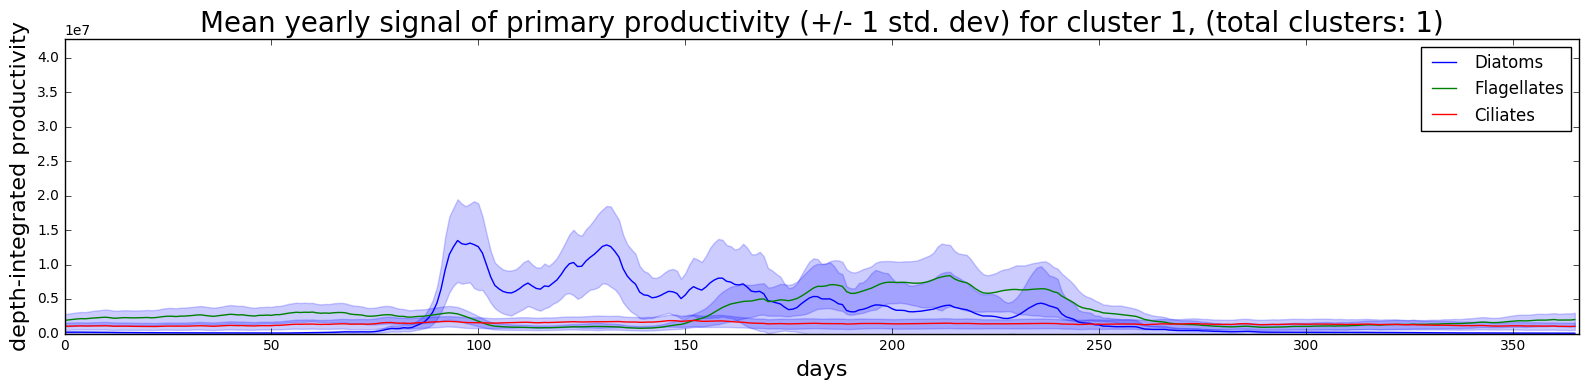

2
2
[2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 

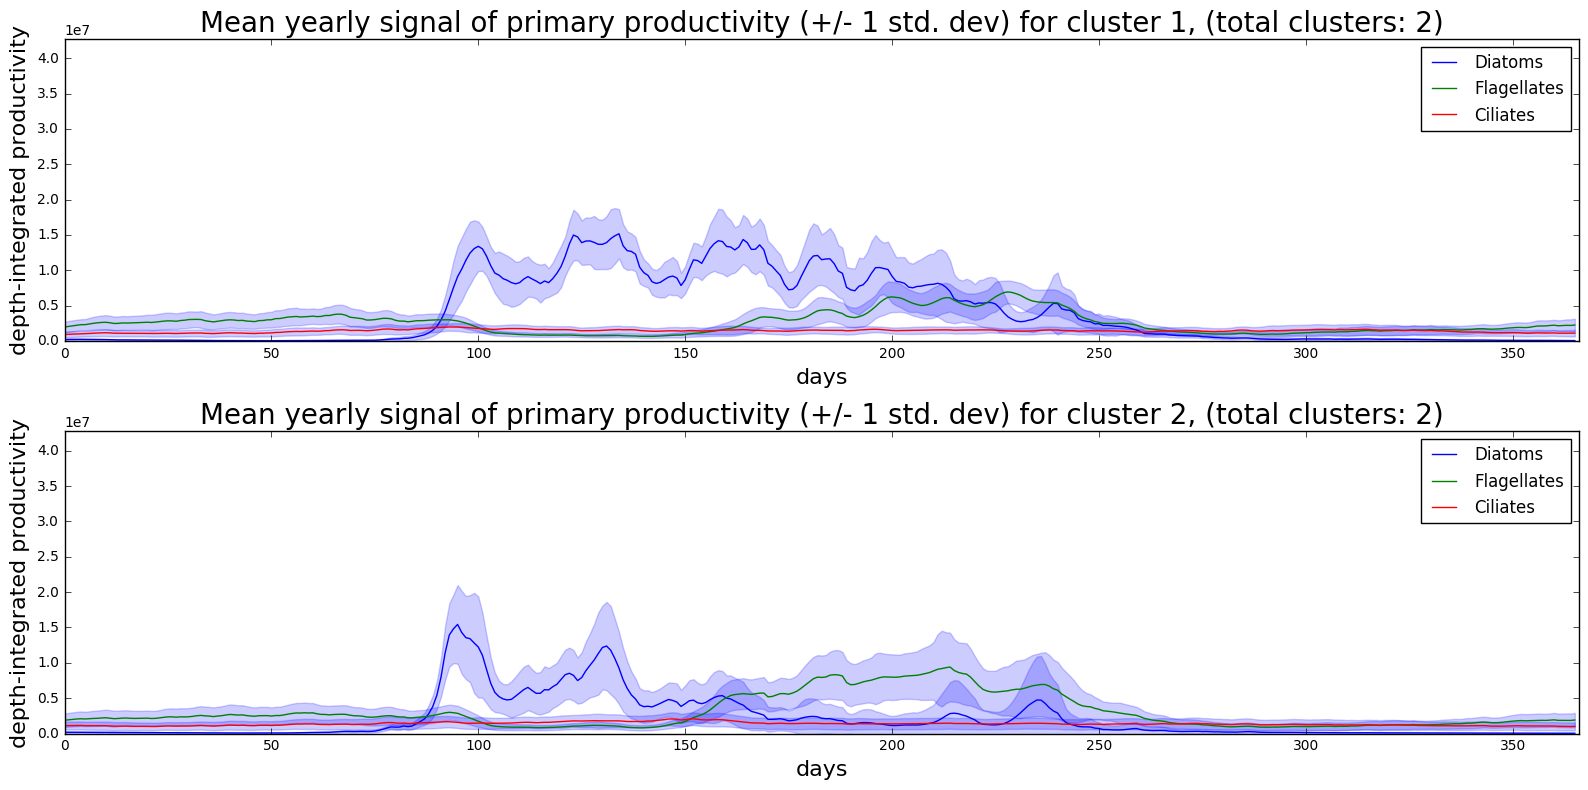

3
3
[1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 3 3 3 3 3 3 1 2 2 2 2 2 2 2 3 3 3 3 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 3 3 2
 2 2 2 2 2 2 2 2 3 1 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 1 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 3 3 3 1 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 1 3 3
 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3
 3 2 2 2 2 2 2 2 2 2 

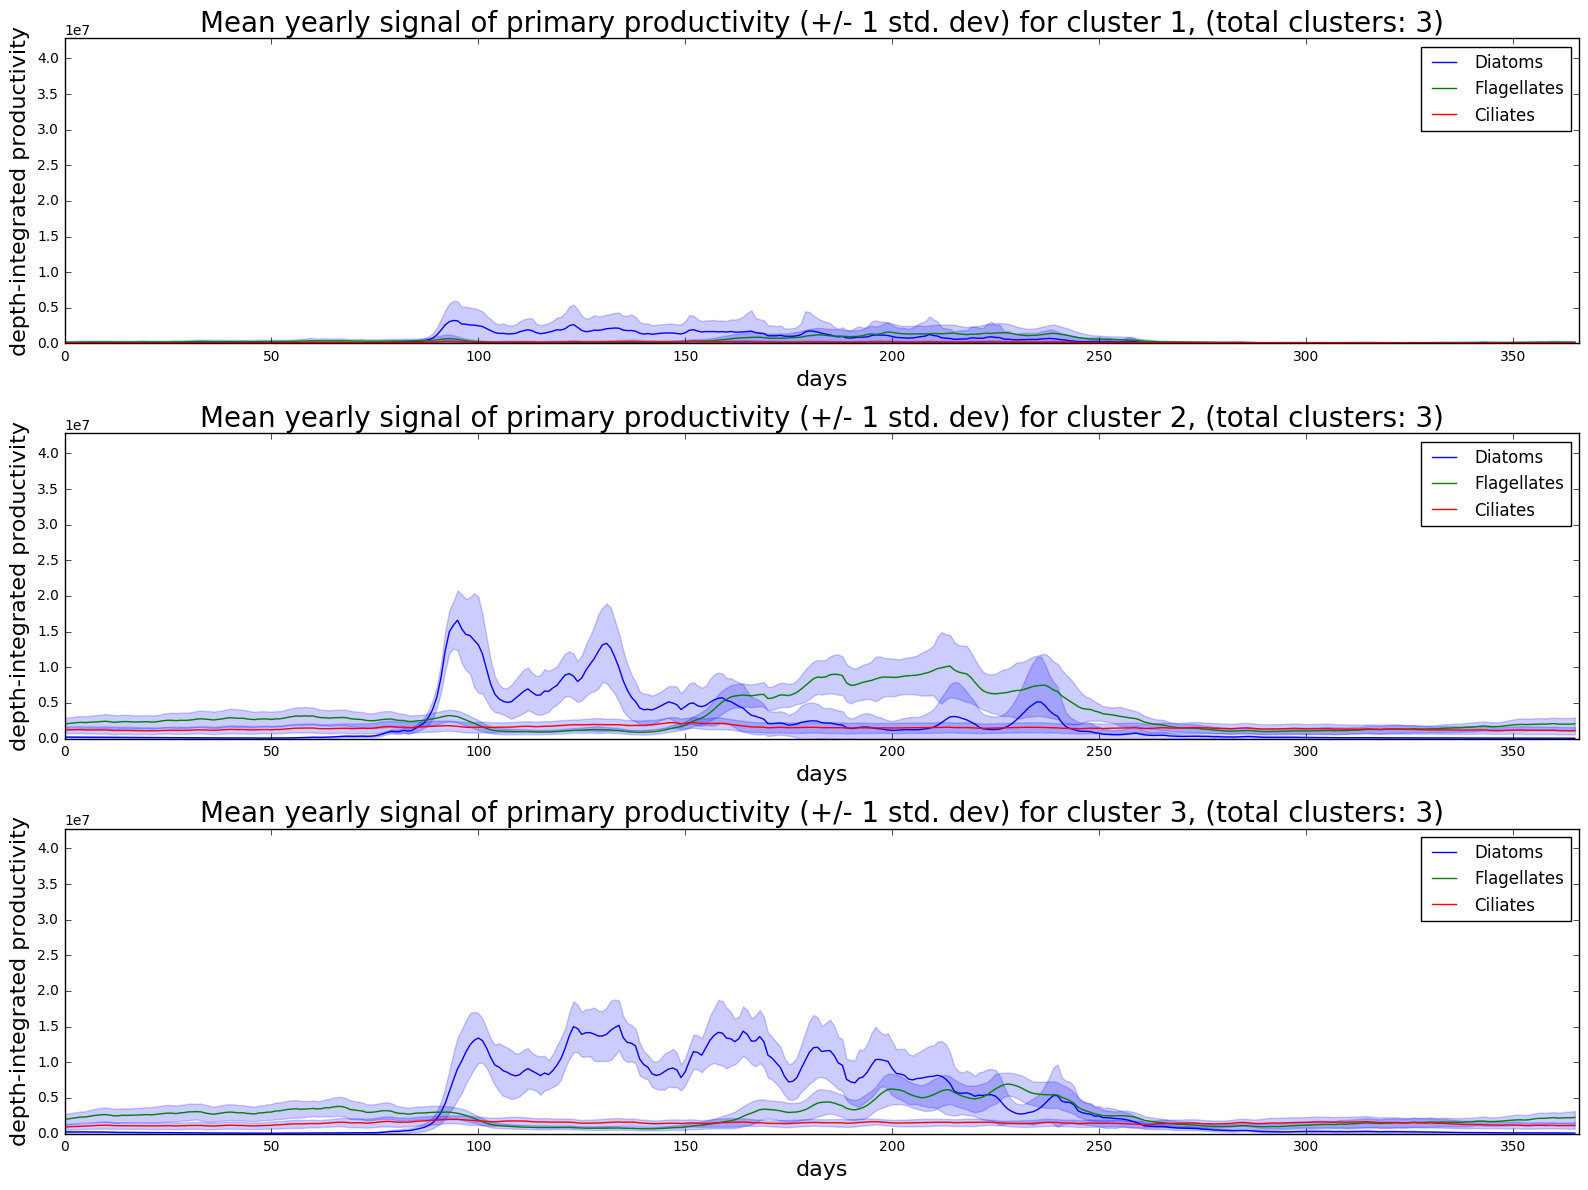

4
4
[3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 3 4 4 4 4 4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 4 4 4 4 4 4 3 2 1 1 1 1 1 2 4 4 4 4 2 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 2 4 4 4 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 4 4
 4 4 4 4 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 2 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 2 4 4 4 4 4 4 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 4 2 4 4 4 4 4 4 2
 1 2 2 1 1 1 1 1 4 3 4 4 4 4 4 2 2 2 2 2 2 2 1 1 1 2 1 2 2 4 4 4 4 4 4 4 2
 3 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 4 4 4 4 4 3 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 1 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 4 4 4 3 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 4 4 4 4 3 4 4
 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 4 4 4 4
 4 2 2 2 2 2 2 2 2 2 

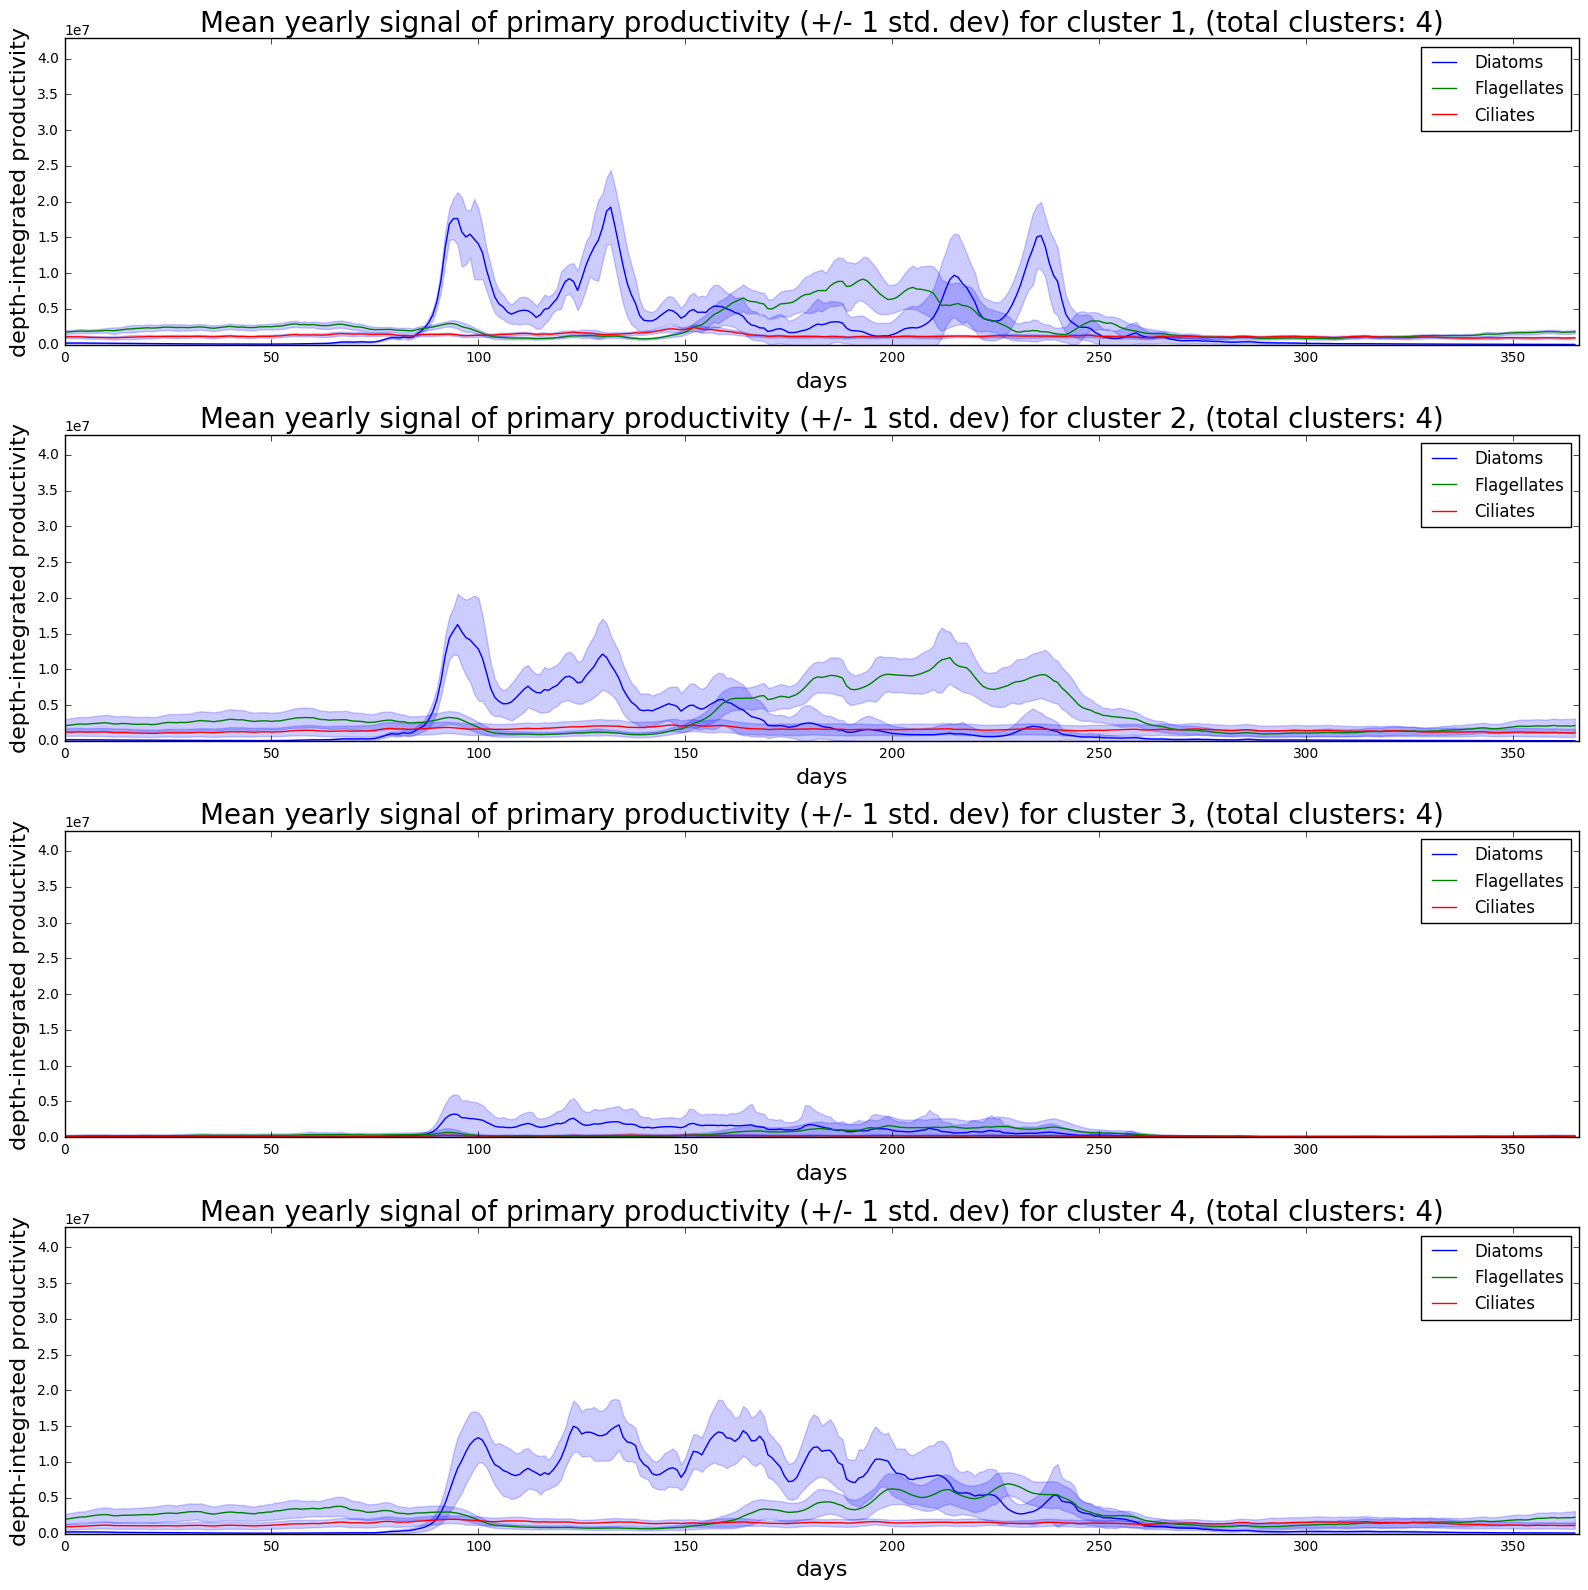

5
5
[4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 4 5 5 5 5 5 5 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 1 1 1 1 2 5 5 5 5 5 5 4 1 3 3 3 3 3 1 5 5 5 5 1 1 3 3
 3 1 3 3 3 3 3 3 3 3 3 3 1 5 5 5 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 5 5
 5 5 5 5 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 1 3 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 5 5 5 5 5 5 5 1 3 3 3 3 3 3 3 3 3 3 3 3 3 5 1 5 5 5 5 5 5 1
 3 1 1 3 3 3 3 3 5 4 5 5 5 5 5 1 1 1 1 1 1 1 3 3 3 1 3 2 2 5 5 5 5 5 5 5 2
 4 2 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 2 2 5 5 5 5 5 5 2 2 1 2 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 3 2 2 5 5 5 5 5 4 5 5 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 3 5 5 5 5 5 5 5 5 5 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 1 5 5 5 4 5 5 5 5 2 2 2 1 1 1 1 1 1 1 1 1 1 1 3 2 2 2 5 5 5 5 4 5 5
 5 5 2 2 1 2 2 2 2 2 2 2 1 1 1 1 1 1 3 2 1 2 5 5 5 5 5 2 1 2 2 2 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 3 1 1 1 5 5 5 5
 5 2 2 2 2 2 2 2 2 1 

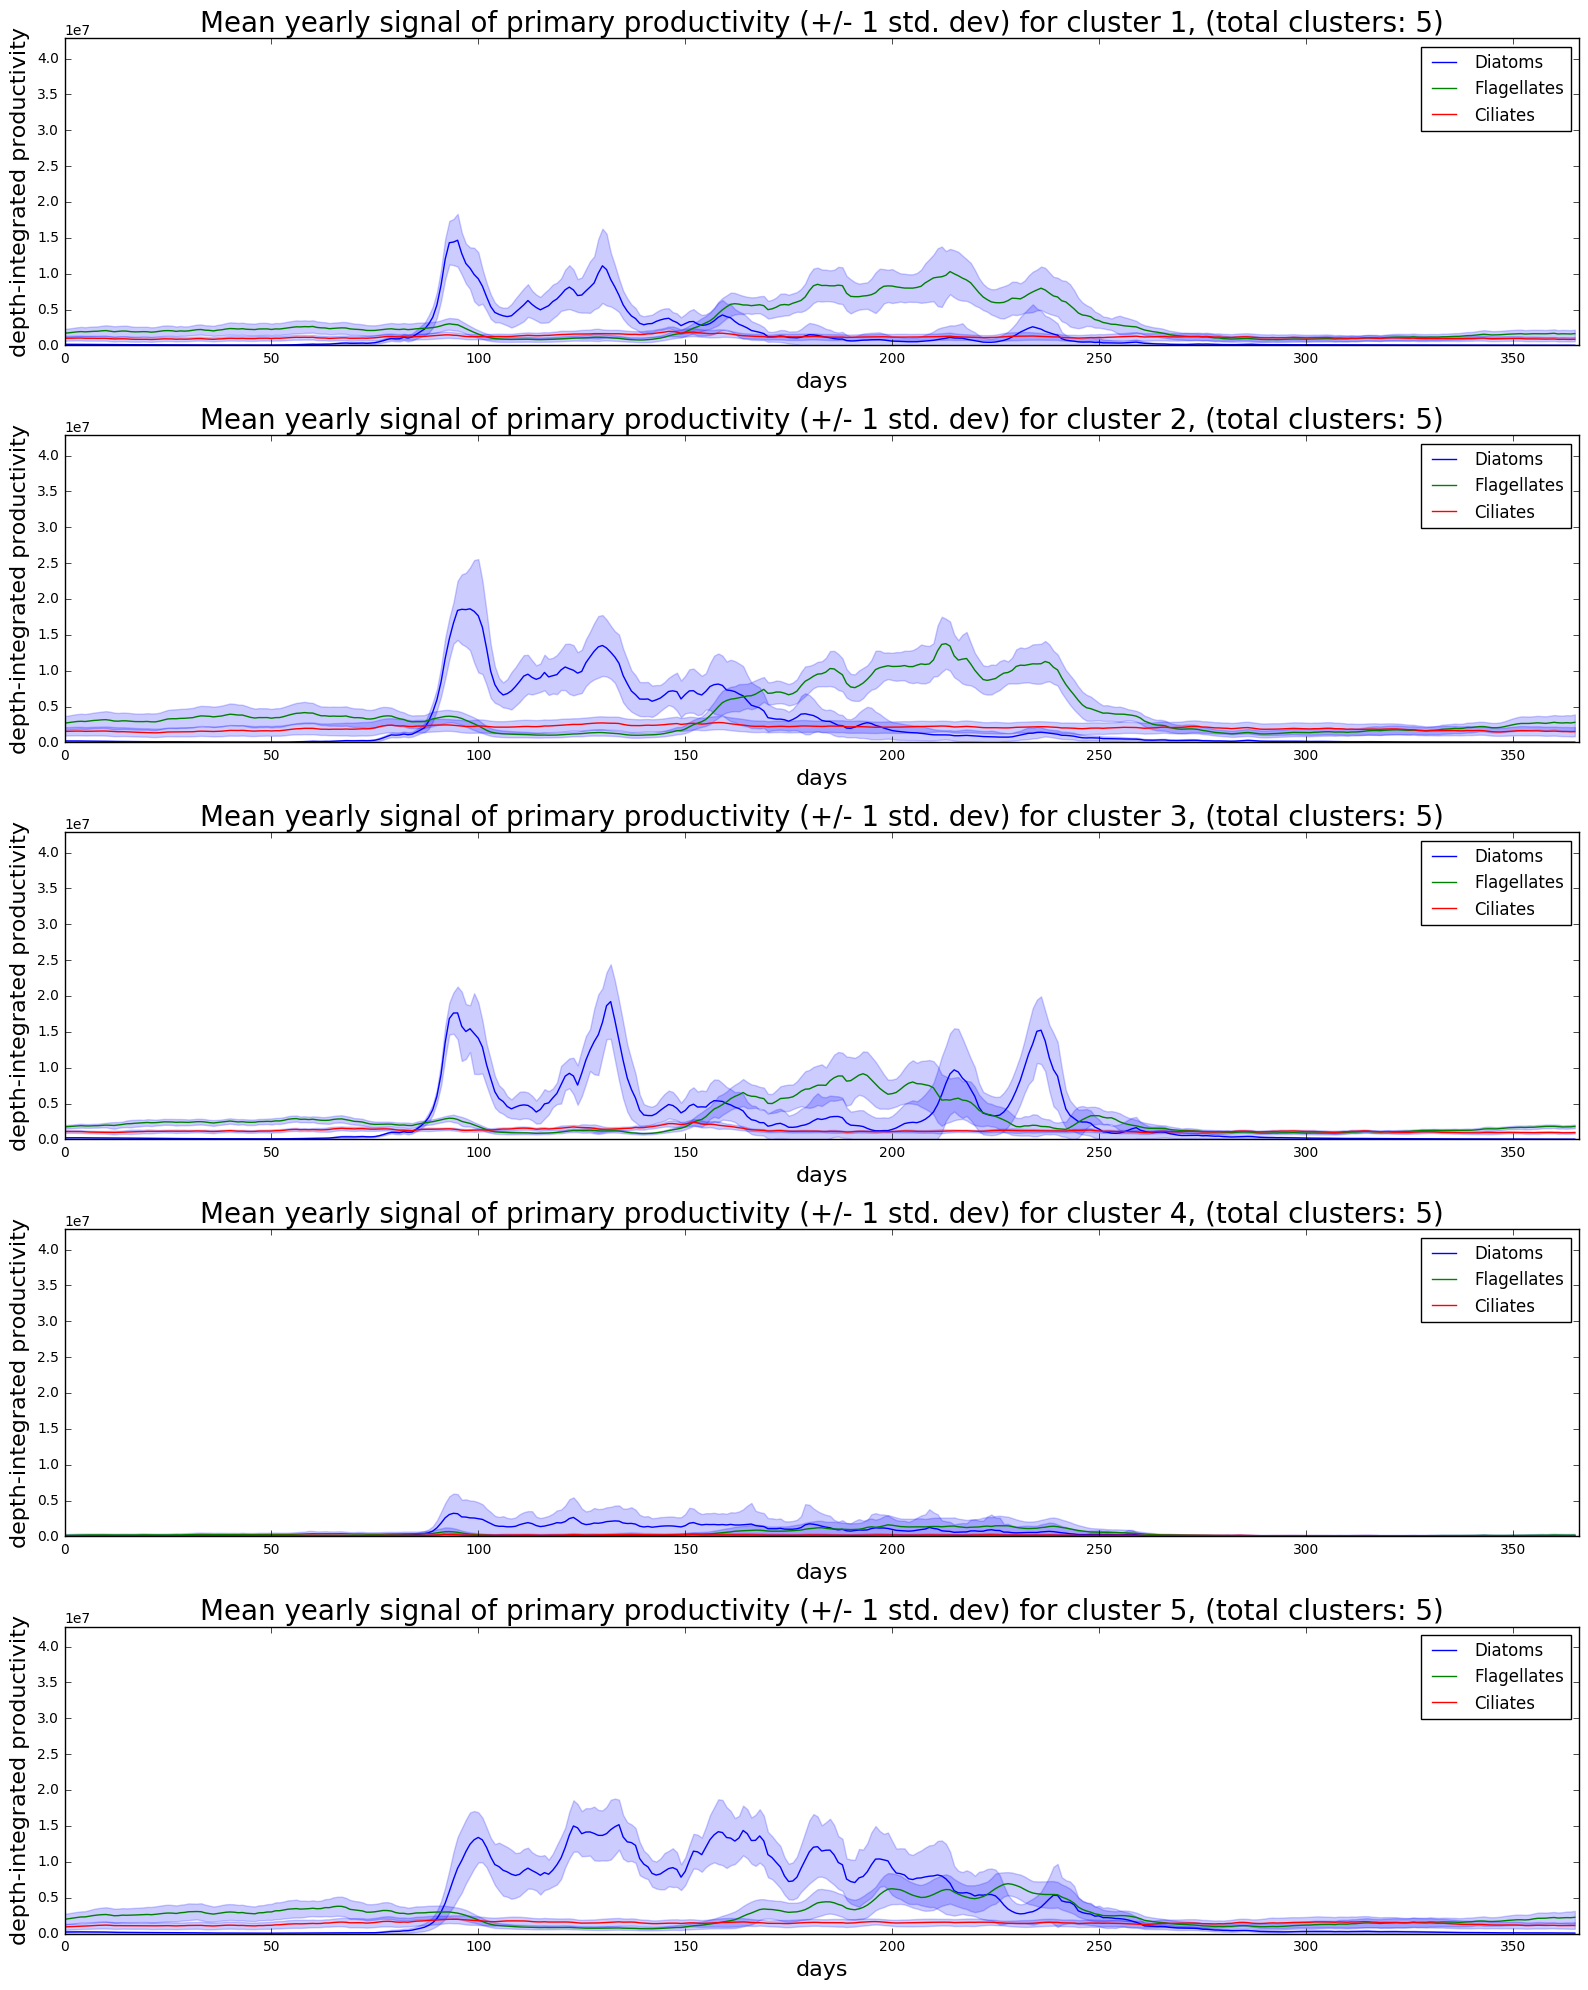

6
6
[6 6 6 6 6 6 6 6 6 6 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 6 1 1 1 1 1 1 1 6 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 2
 2 1 1 1 2 2 1 2 2 2 3 3 3 3 4 2 1 2 2 2 2 6 3 5 5 5 5 5 3 2 1 2 2 3 3 5 5
 5 3 5 5 5 5 5 5 5 5 5 5 3 1 2 2 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 2 2
 2 2 2 2 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 1 2 2 2 2 2 3 5 5 3 5 5 5 5 5 5 5
 5 5 5 5 5 5 3 2 2 2 2 2 2 2 3 5 5 5 5 5 5 5 5 5 5 5 5 5 2 3 1 2 2 2 2 2 3
 5 3 3 5 5 5 5 5 2 6 1 2 2 2 2 3 3 3 3 3 3 3 5 5 5 3 5 4 4 1 1 1 2 2 2 2 4
 6 4 3 3 3 3 3 3 3 3 3 3 3 3 5 4 4 4 4 1 2 2 2 2 2 4 4 3 4 3 3 4 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 5 4 4 1 2 2 2 2 6 2 2 4 4 4 3 3 4 4 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 5 1 2 2 2 2 2 2 2 2 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 3 2 2 2 6 2 2 2 2 4 4 4 3 3 3 3 3 3 3 3 3 3 3 5 4 4 4 1 1 2 2 6 2 2
 2 2 4 4 3 4 4 4 4 4 4 4 3 3 3 3 3 3 5 4 3 4 2 2 2 2 2 4 3 4 4 4 4 4 4 4 4
 4 4 4 4 3 3 3 3 3 3 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 5 3 3 3 2 2 2 2
 2 4 4 4 4 4 4 4 4 3 

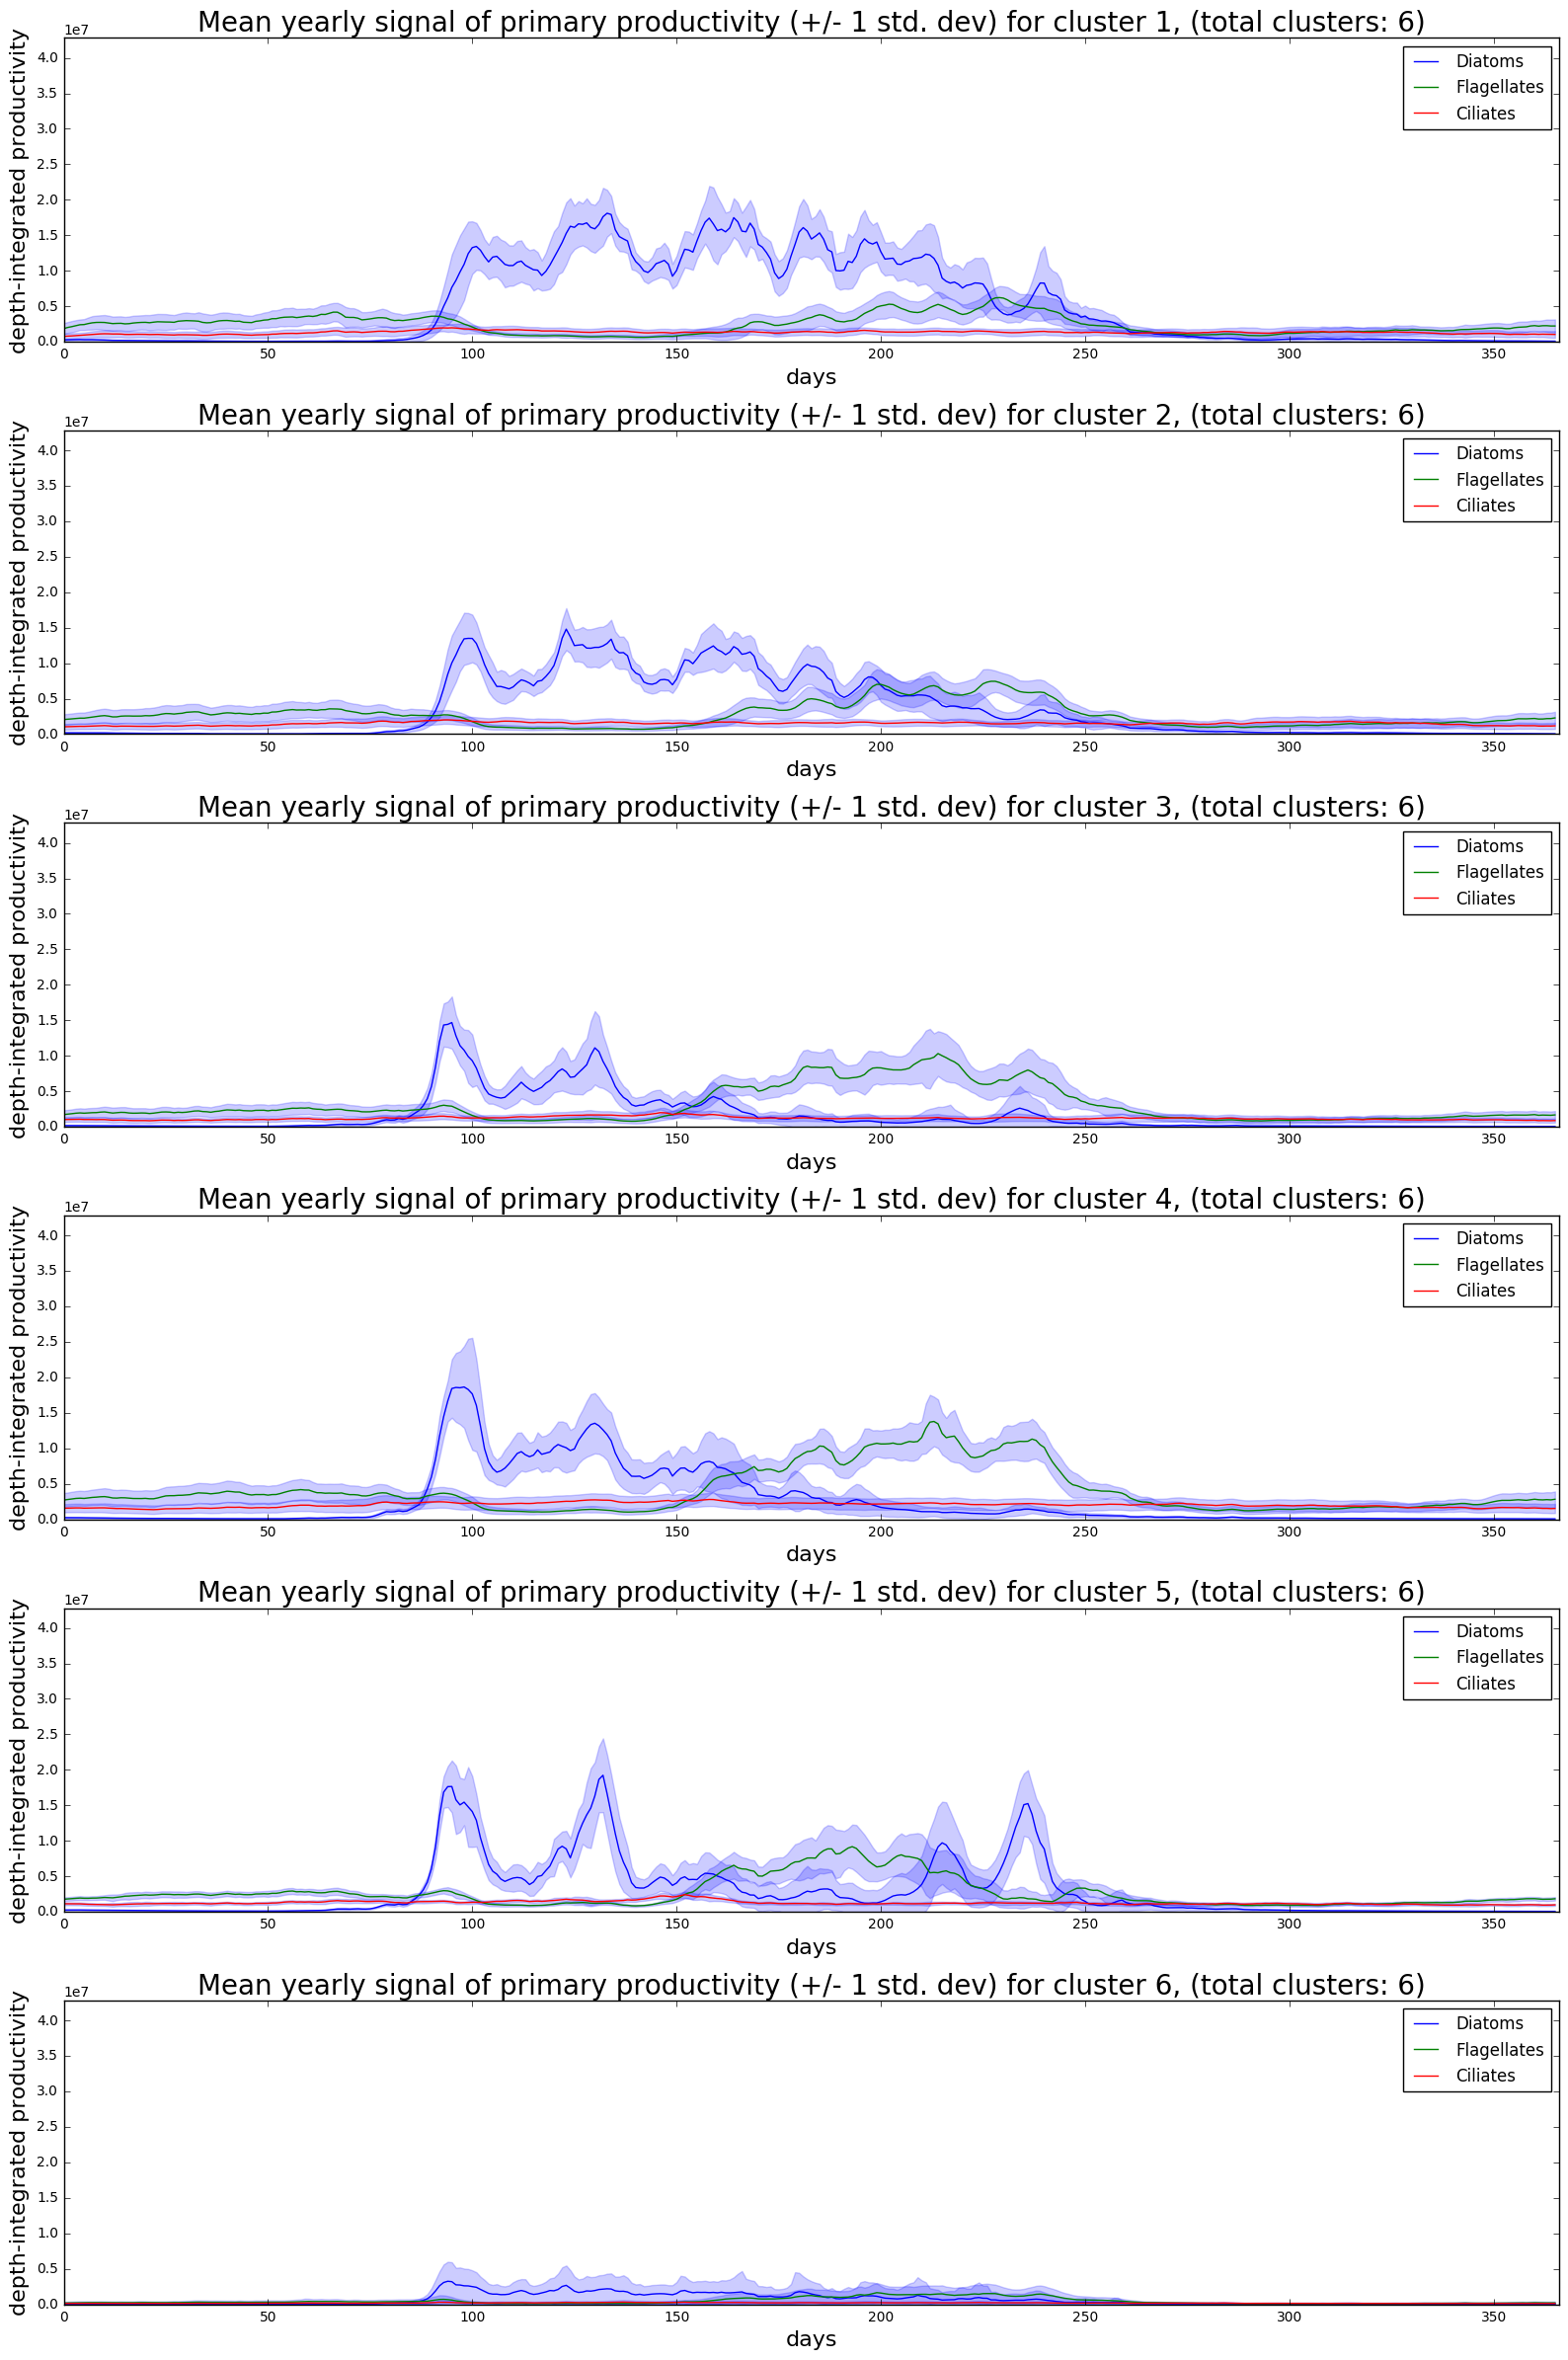

7
7
[7 7 7 7 7 7 7 7 7 7 3 3 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 7 3 3 3 3 3 3 3 7 4 3 3 3 3 3 3 3 3 3 3 4 4 3 3 3 3 4 4 4 3 3 3 4
 4 3 3 3 4 4 3 4 4 4 5 5 5 5 2 4 3 4 4 4 4 7 5 6 6 6 6 6 5 4 3 4 4 5 5 6 6
 6 5 6 6 6 6 6 6 6 6 6 6 5 3 4 4 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 4 4
 4 4 4 4 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 3 4 4 4 4 4 5 6 6 5 6 6 6 6 6 6 6
 6 6 6 6 6 6 5 4 4 4 4 4 4 4 5 6 6 6 6 6 6 6 6 6 6 6 6 6 4 5 3 4 4 4 4 4 5
 6 5 5 6 6 6 6 6 4 7 3 4 4 4 4 5 5 5 5 5 5 5 6 6 6 5 6 2 2 3 3 3 4 4 4 4 2
 7 2 5 5 5 5 5 5 5 5 5 5 5 5 6 2 2 2 2 3 4 4 4 4 4 2 2 5 2 5 5 2 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 6 2 2 3 4 4 4 4 7 4 4 1 1 1 5 5 2 2 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 2 2 6 3 4 4 4 4 4 4 4 4 1 2 2 2 2 5 5 5 5 5 5 5 5 5 5 5 5
 5 2 2 5 4 4 4 7 4 4 4 4 1 2 2 5 5 5 5 5 5 5 5 5 5 5 6 2 2 2 3 3 4 4 7 4 4
 4 4 2 1 5 2 2 2 2 2 2 2 5 5 5 5 5 5 6 2 5 2 4 4 4 4 4 1 5 1 2 2 2 2 2 2 2
 2 2 2 2 5 5 5 5 5 5 4 4 1 1 2 2 2 2 2 2 2 2 2 2 2 2 5 5 5 6 5 5 5 4 4 4 4
 4 1 2 2 1 2 2 2 2 5 

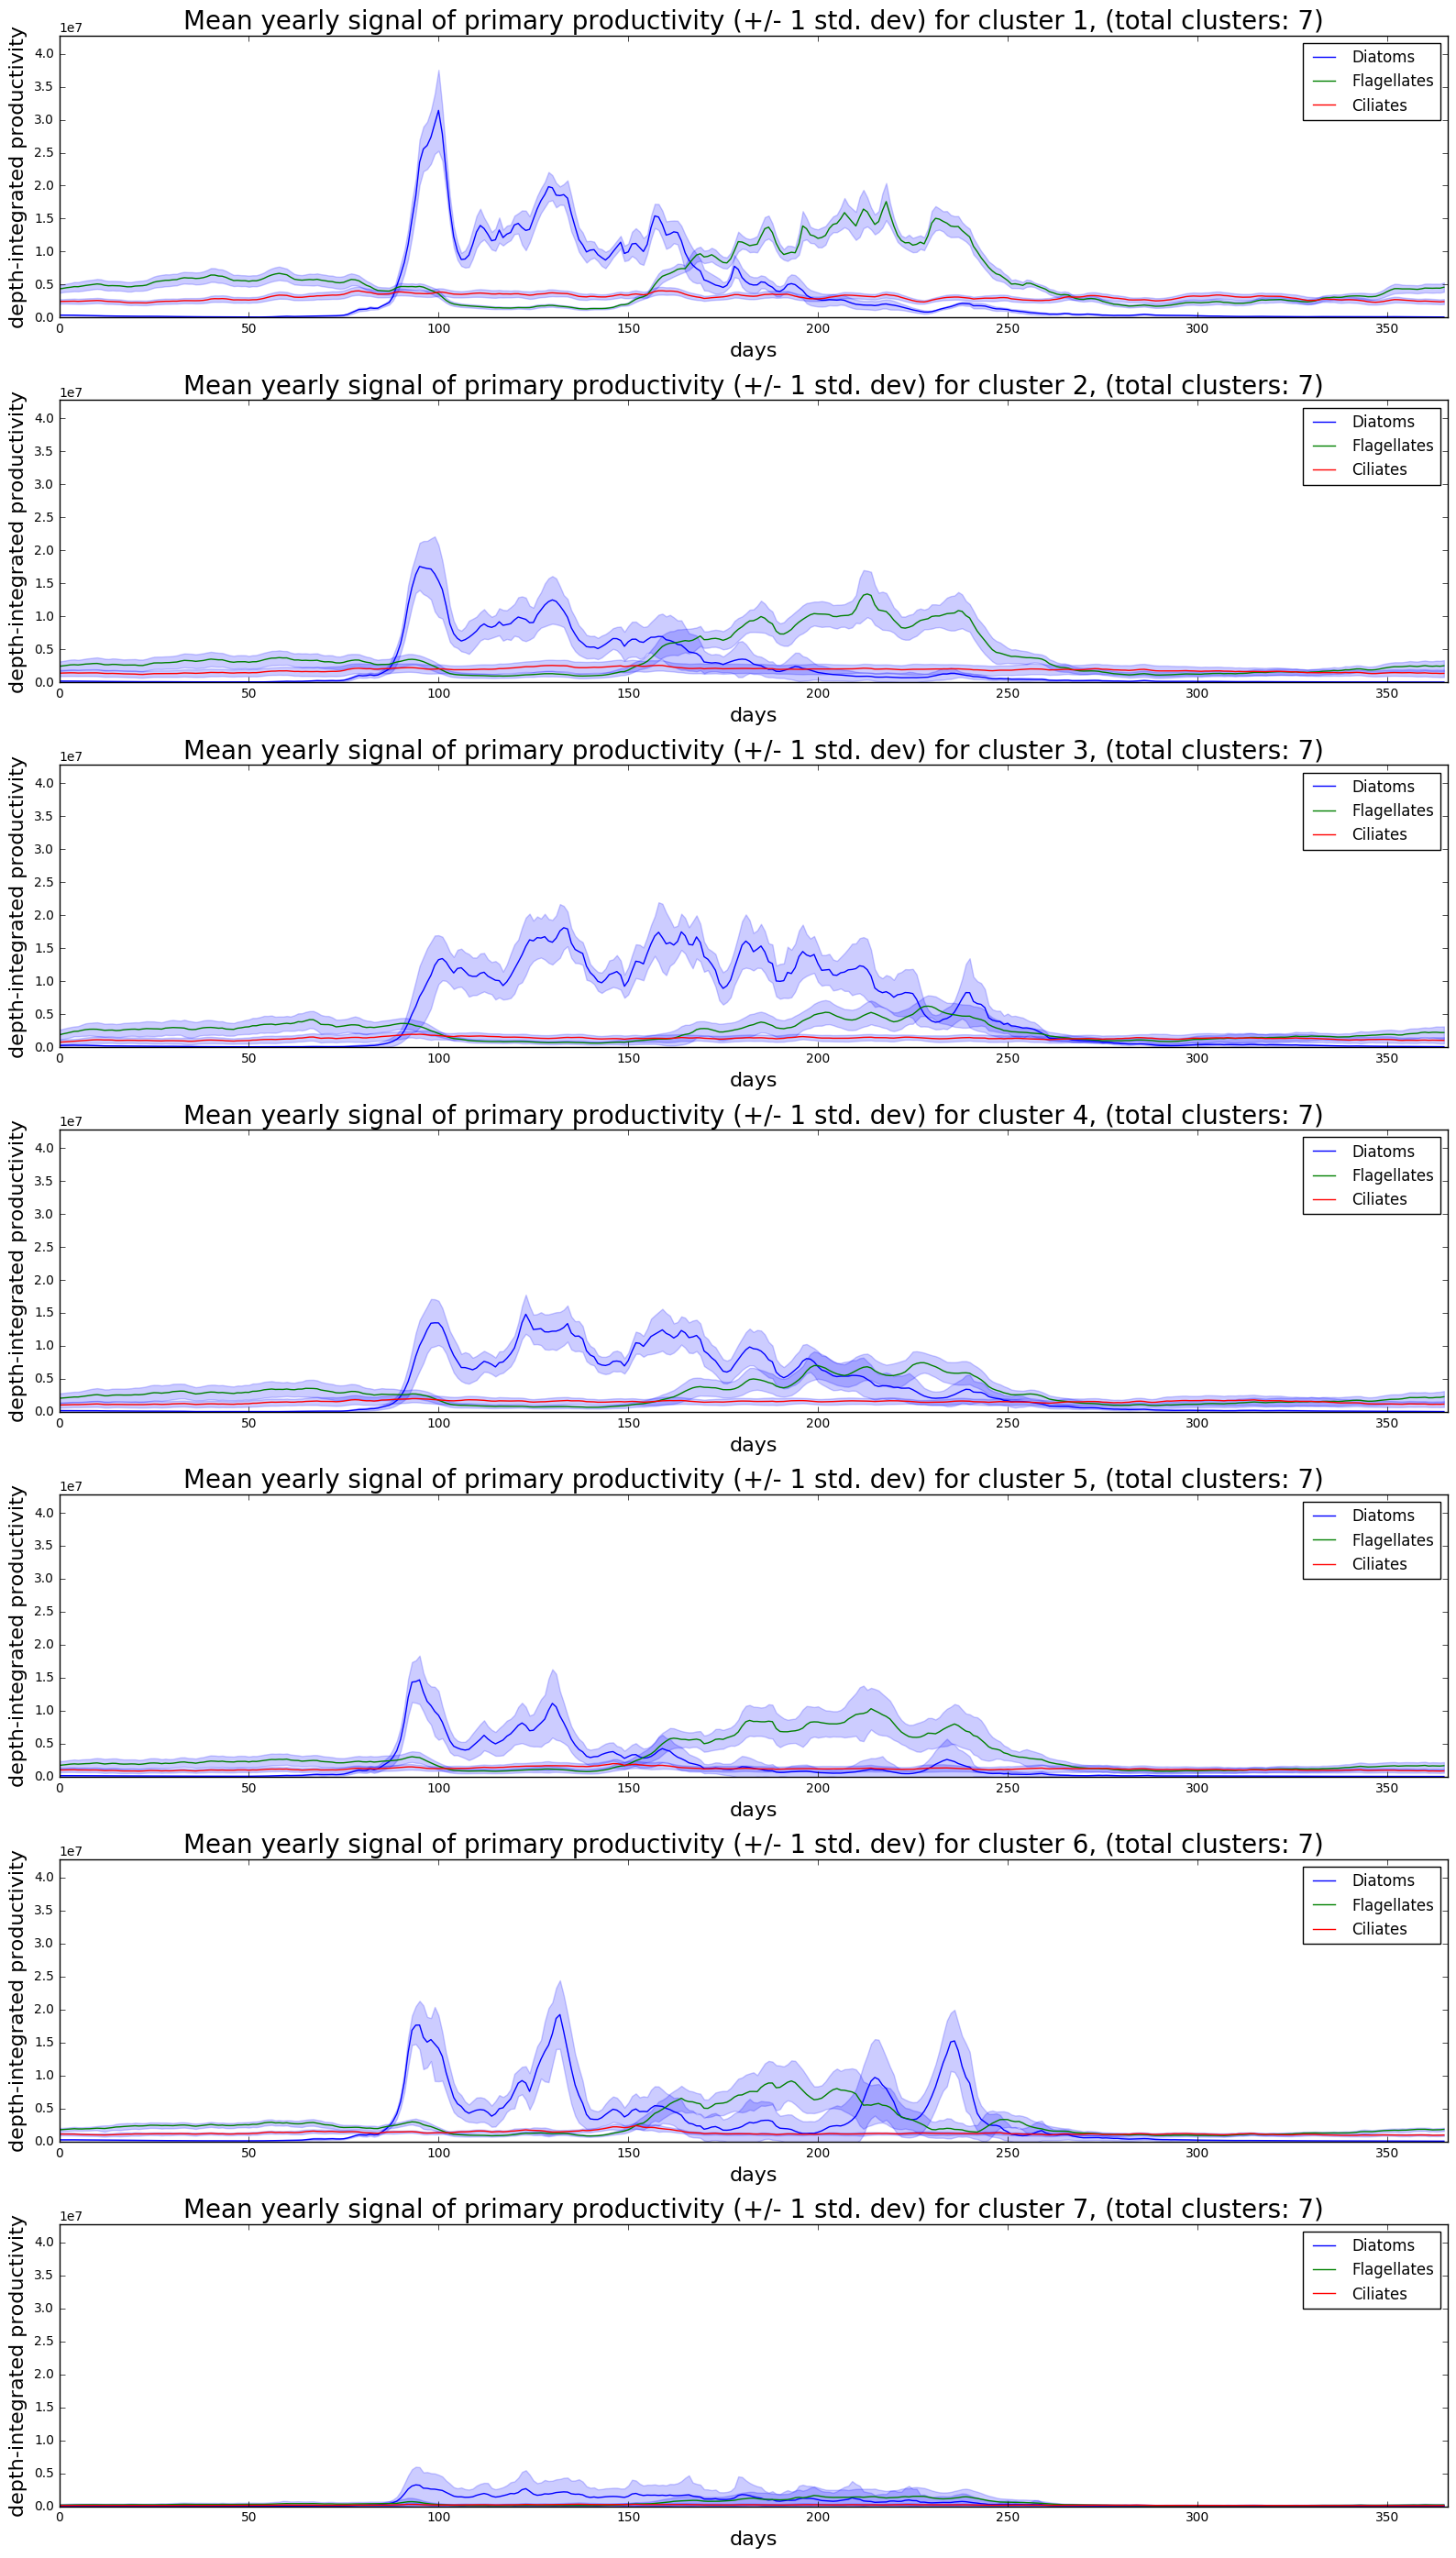

8
8
[8 8 8 8 8 8 8 8 8 8 5 5 6 6 6 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 8 5 5 5 5 5 5 5 8 6 5 5 5 5 5 5 5 5 5 5 6 6 5 5 5 5 6 6 6 5 5 5 6
 6 5 5 5 6 6 5 6 6 6 7 7 7 7 4 6 5 6 6 6 6 8 7 2 2 2 2 2 7 6 5 6 6 7 7 1 1
 1 7 2 2 2 2 2 2 2 2 2 2 7 5 6 6 7 7 7 1 1 1 2 2 2 2 2 2 2 2 1 1 2 7 7 6 6
 6 6 6 6 7 7 7 7 1 1 1 1 1 1 1 1 1 1 1 1 5 6 6 6 6 6 7 1 1 7 1 1 1 1 1 1 1
 1 1 1 1 1 1 7 6 6 6 6 6 6 6 7 1 1 1 1 1 1 1 1 1 1 1 1 2 6 7 5 6 6 6 6 6 7
 1 7 7 1 1 1 1 2 6 8 5 6 6 6 6 7 7 7 7 7 7 7 1 1 1 7 2 4 4 5 5 5 6 6 6 6 4
 8 4 7 7 7 7 7 7 7 7 7 7 7 7 2 4 4 4 4 5 6 6 6 6 6 4 4 7 4 7 7 4 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 2 4 4 5 6 6 6 6 8 6 6 3 3 3 7 7 4 4 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 4 4 2 5 6 6 6 6 6 6 6 6 3 4 4 4 4 7 7 7 7 7 7 7 7 7 7 7 7
 7 4 4 7 6 6 6 8 6 6 6 6 3 4 4 7 7 7 7 7 7 7 7 7 7 7 2 4 4 4 5 5 6 6 8 6 6
 6 6 4 3 7 4 4 4 4 4 4 4 7 7 7 7 7 7 2 4 7 4 6 6 6 6 6 3 7 3 4 4 4 4 4 4 4
 4 4 4 4 7 7 7 7 7 7 6 6 3 3 4 4 4 4 4 4 4 4 4 4 4 4 7 7 7 2 7 7 7 6 6 6 6
 6 3 4 4 3 4 4 4 4 7 

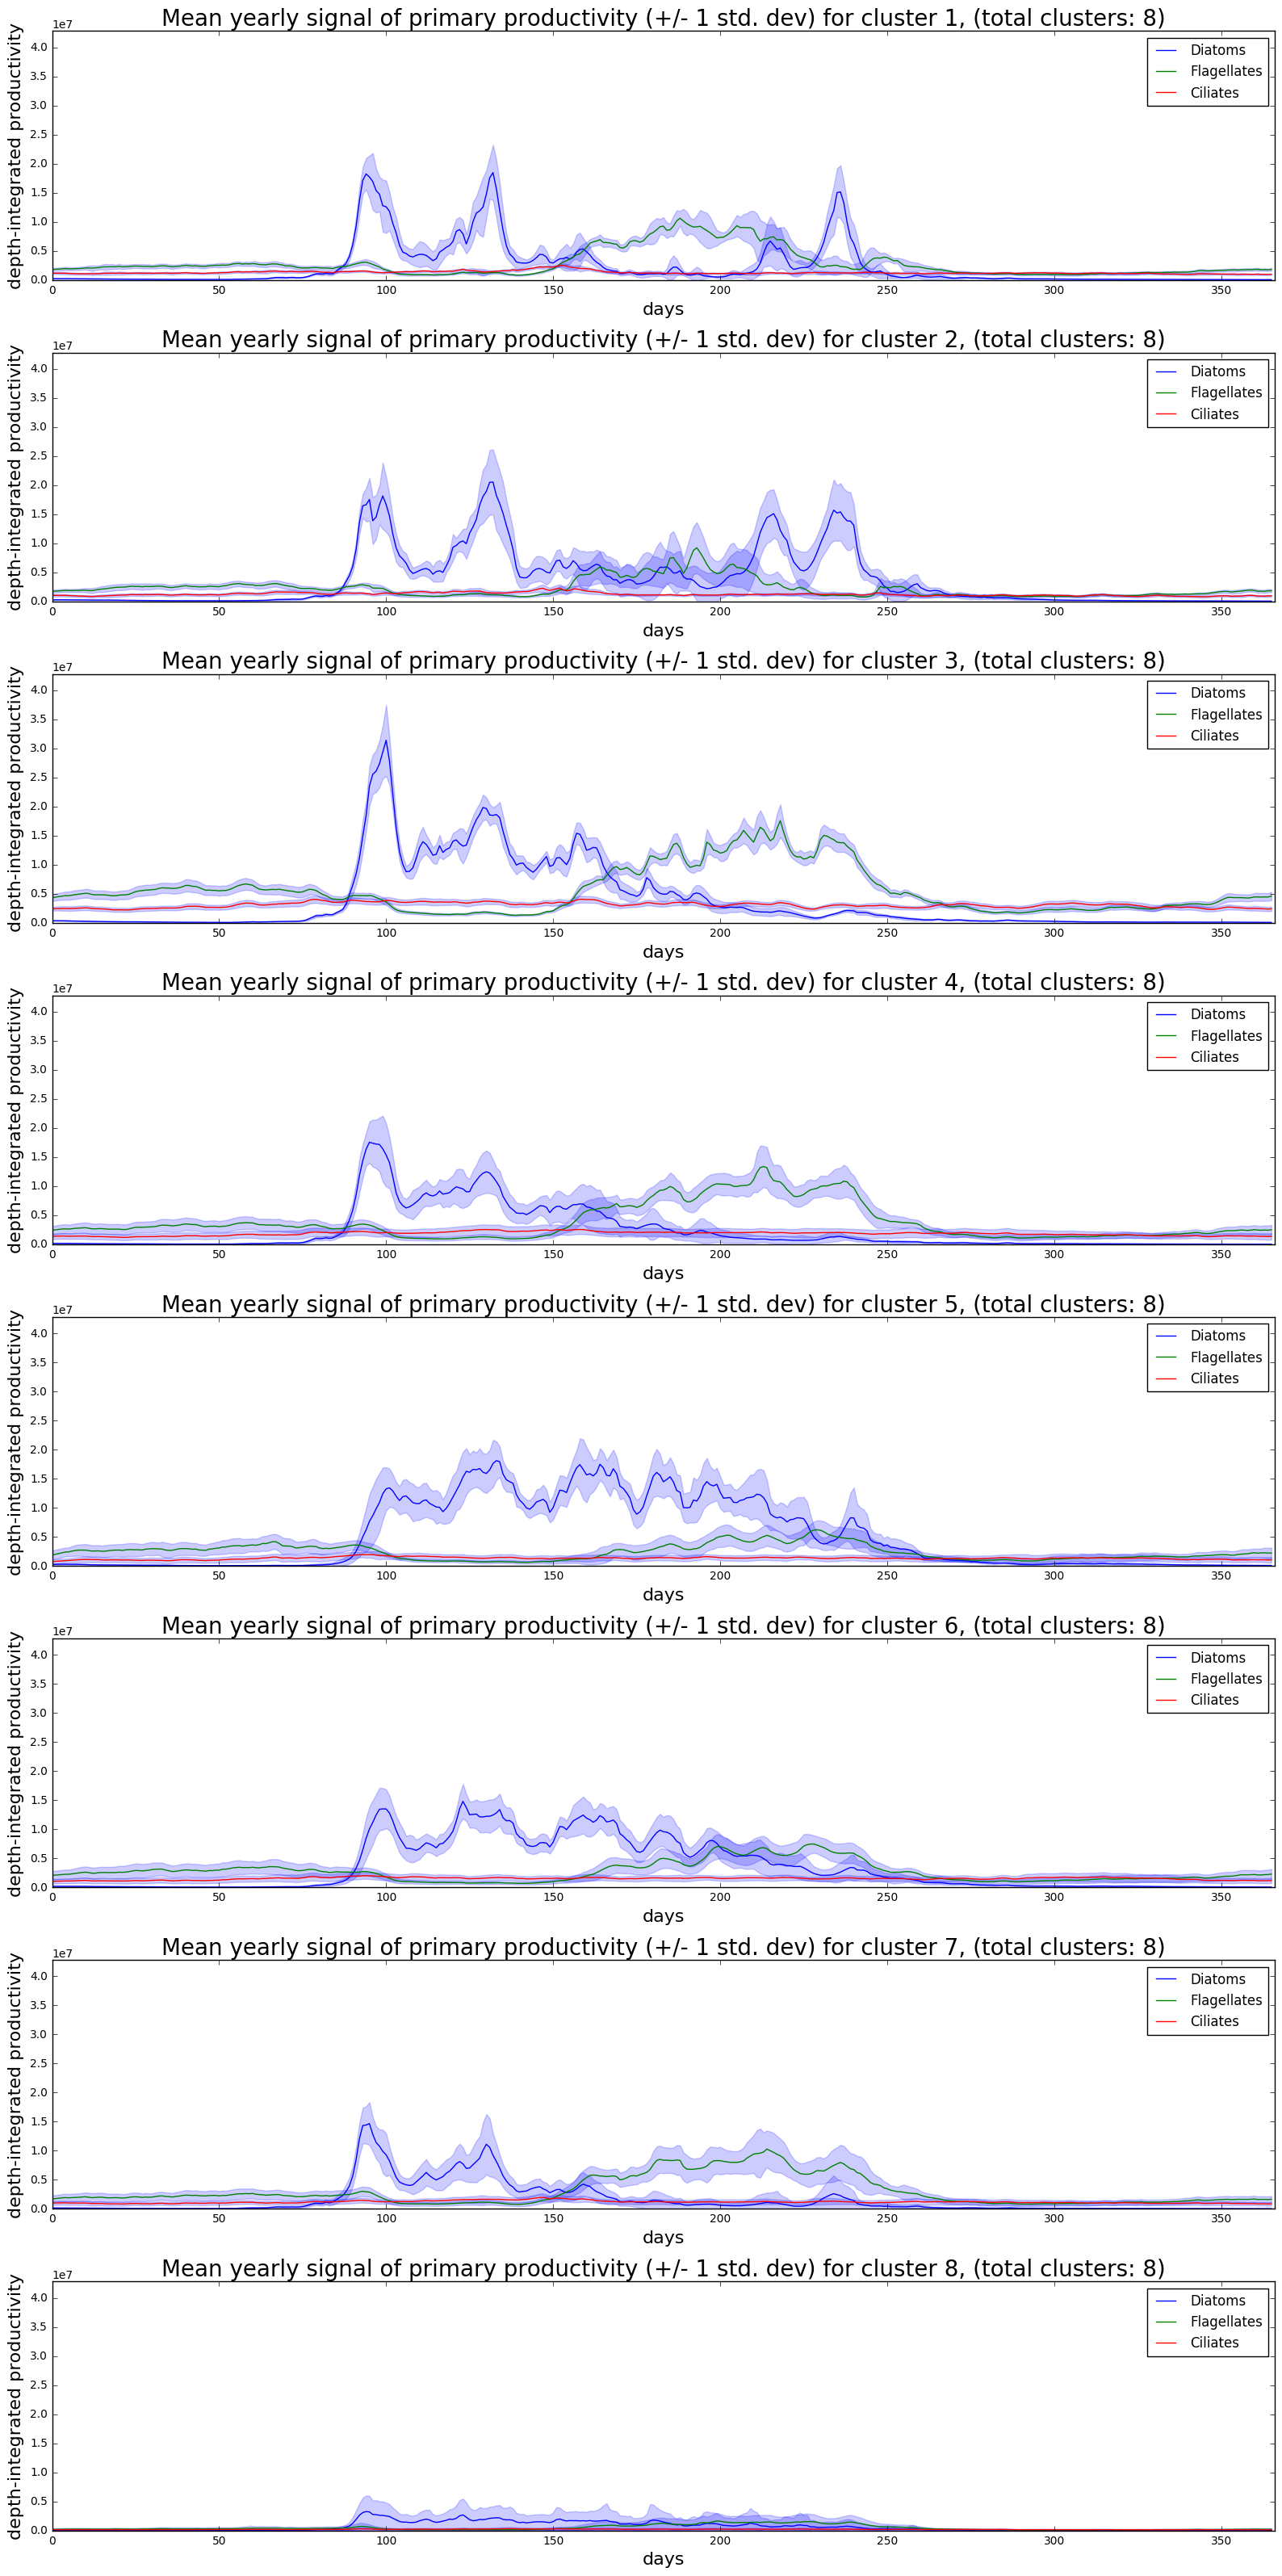

9
9
[9 9 9 9 9 9 9 9 9 9 7 7 8 8 8 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 9 7 7 7 7 7 7 7 9 8 7 7 7 7 7 7 7 7 7 7 8 8 7 7 7 7 8 8 8 7 7 7 8
 8 7 7 7 8 8 7 8 8 8 1 1 1 1 6 8 7 8 8 8 8 9 1 4 4 4 4 4 2 8 7 8 8 2 2 3 3
 3 1 4 4 4 4 4 4 4 4 4 4 2 7 8 8 2 2 2 3 3 3 4 4 4 4 4 4 4 4 3 3 4 2 2 8 8
 8 8 8 8 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 7 8 8 8 8 8 2 3 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 8 8 8 8 8 8 8 2 3 3 3 3 3 3 3 3 3 3 3 3 4 8 2 7 8 8 8 8 8 2
 3 2 2 3 3 3 3 4 8 9 7 8 8 8 8 2 2 2 2 2 2 2 3 3 3 1 4 6 6 7 7 7 8 8 8 8 6
 9 6 2 2 2 2 2 2 2 2 2 2 2 1 4 6 6 6 6 7 8 8 8 8 8 6 6 1 6 1 1 6 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 6 6 7 8 8 8 8 9 8 8 5 5 5 1 1 6 6 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 6 6 4 7 8 8 8 8 8 8 8 8 5 6 6 6 6 2 2 2 2 2 2 2 2 2 2 2 2
 2 6 6 1 8 8 8 9 8 8 8 8 5 6 6 2 2 2 2 2 2 2 2 2 2 2 4 6 6 6 7 7 8 8 9 8 8
 8 8 6 5 1 6 6 6 6 6 6 6 2 2 2 2 2 2 4 6 1 6 8 8 8 8 8 5 1 5 6 6 6 6 6 6 6
 6 6 6 6 2 2 2 2 2 1 8 8 5 5 6 6 6 6 6 6 6 6 6 6 6 6 2 2 2 4 2 2 1 8 8 8 8
 8 5 6 6 5 6 6 6 6 1 

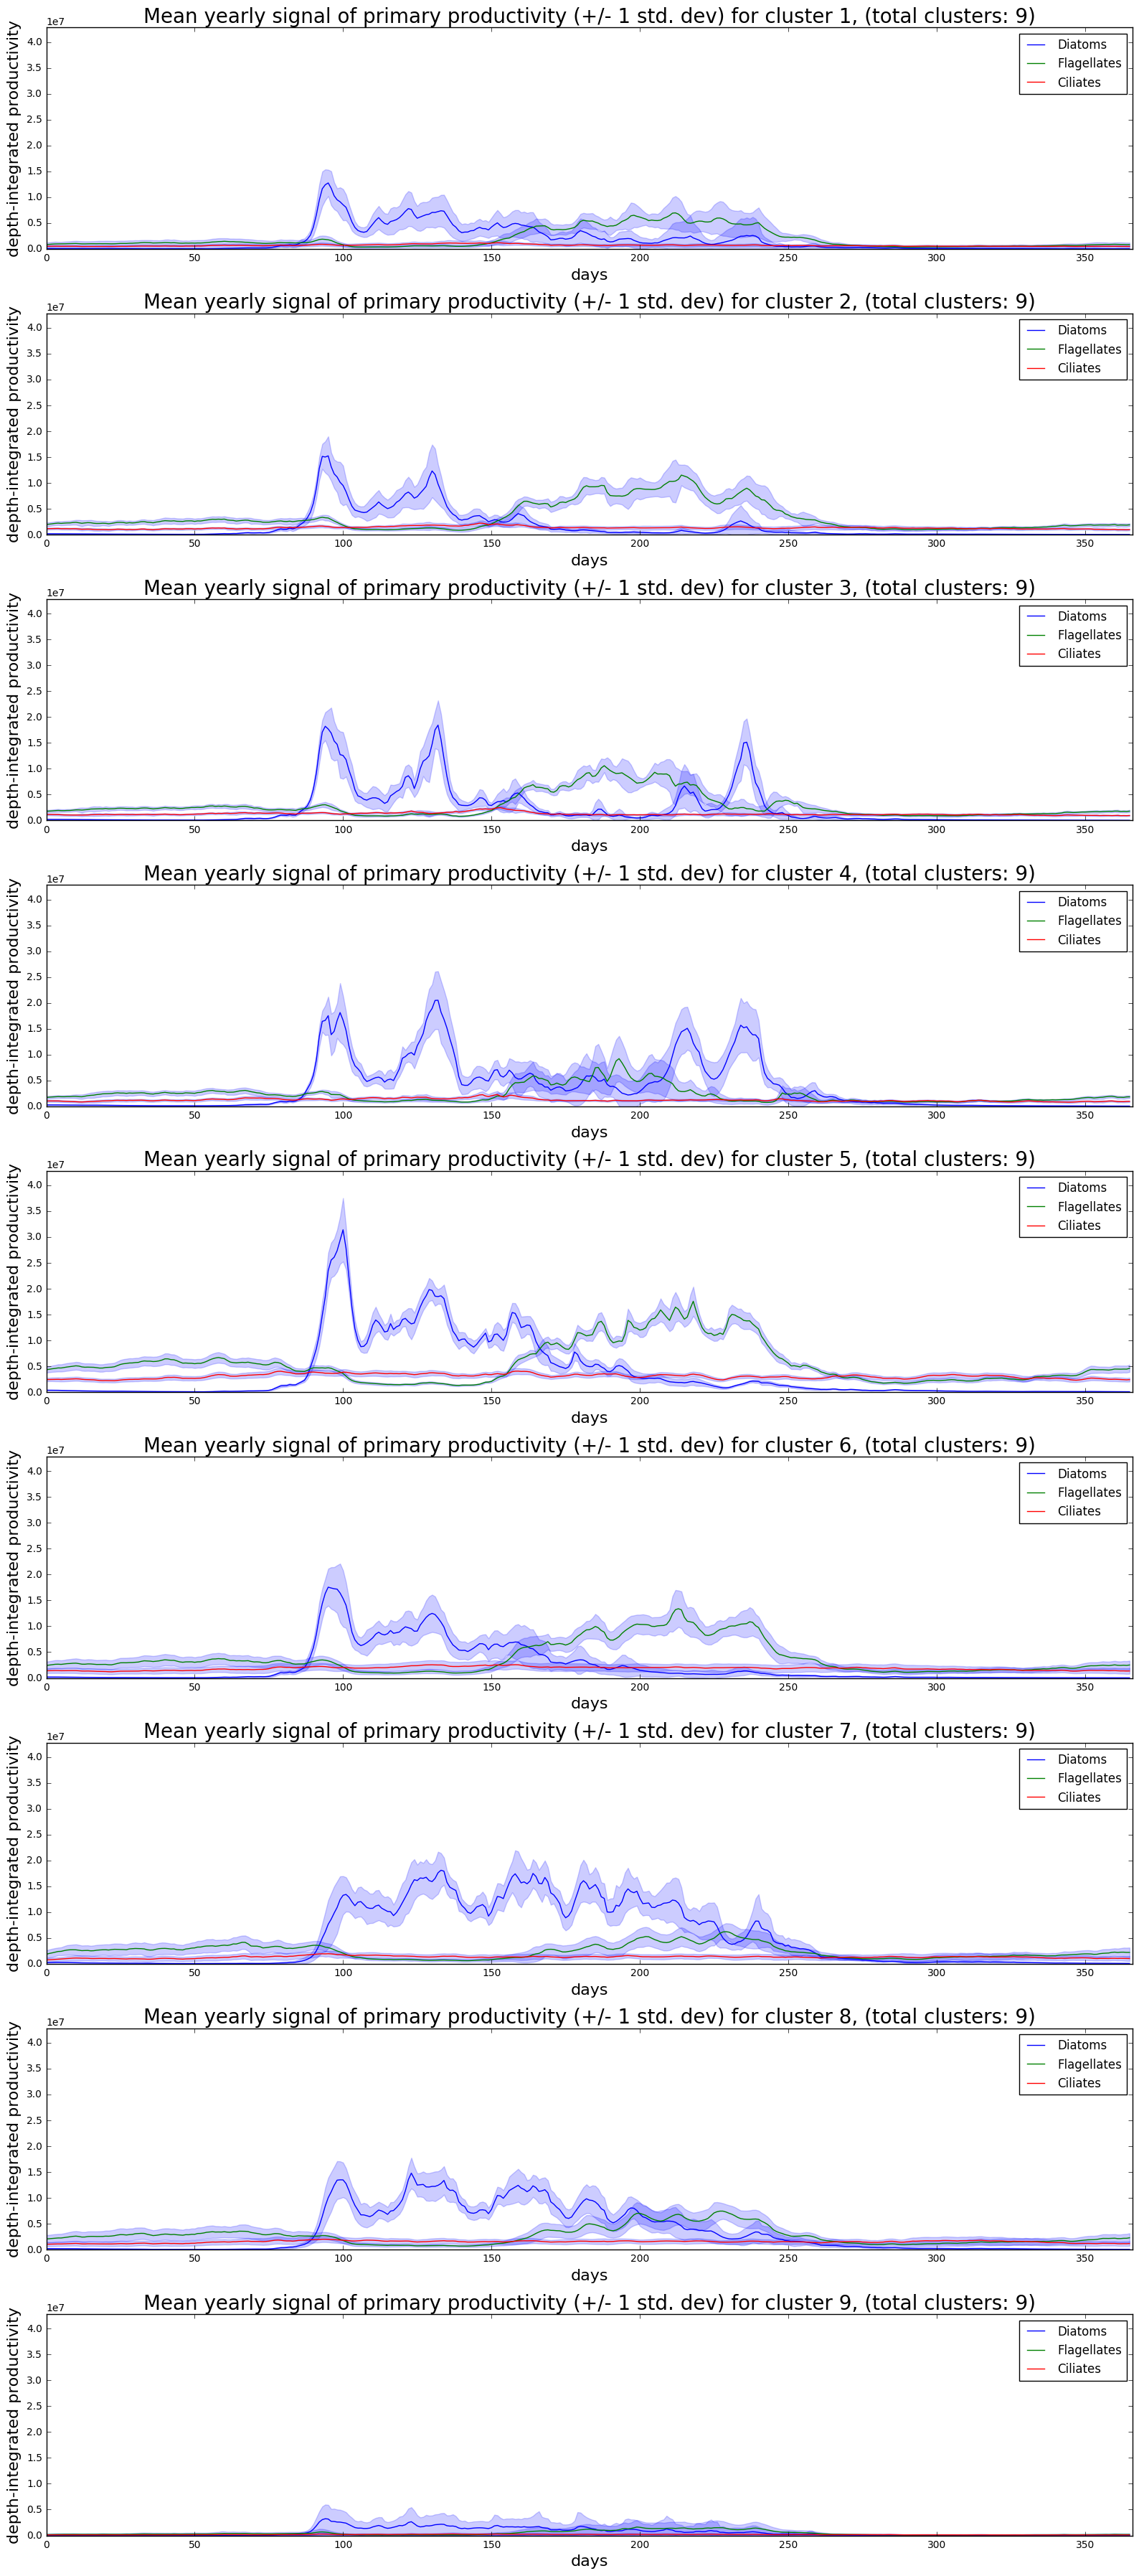

10
10
[10 10 10 10 10 10 10 10 10 10  9  9  2  2  2  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9 10  9  9  9  9  9  9
  9 10  2  9  9  9  9  9  9  9  9  9  9  1  1  9  9  9  9  1  1  2  9  9
  9  1  1  9  9  9  1  1  9  1  1  1  3  3  3  3  8  2  9  1  1  1  2 10
  3  6  6  6  6  6  4  2  9  1  1  4  4  5  5  5  3  6  6  6  6  6  6  6
  6  6  6  4  9  1  1  4  4  4  5  5  5  6  6  6  6  6  6  6  6  5  5  6
  4  4  2  1  1  1  1  1  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  9  1  1  1  1  1  4  5  5  4  5  5  5  5  5  5  5  5  5  5  5  5  5  4
  2  2  2  1  1  1  2  4  5  5  5  5  5  5  5  5  5  5  5  5  6  1  4  9
  1  1  1  2  1  4  5  4  4  5  5  5  5  6  1 10  9  1  1  1  2  4  4  4
  4  4  4  4  5  5  5  3  6  8  8  9  9  9  1  1  1  1  8 10  8  4  4  4
  4  4  4  4  4  4  4  4  3  6  8  8  8  8  9  2  1  2  1  1  8  8  3  8
  3  3  8  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  6  8  8  9  2
  1  1  1 10  1  2  7  7  7  3  3  8  8  3  4

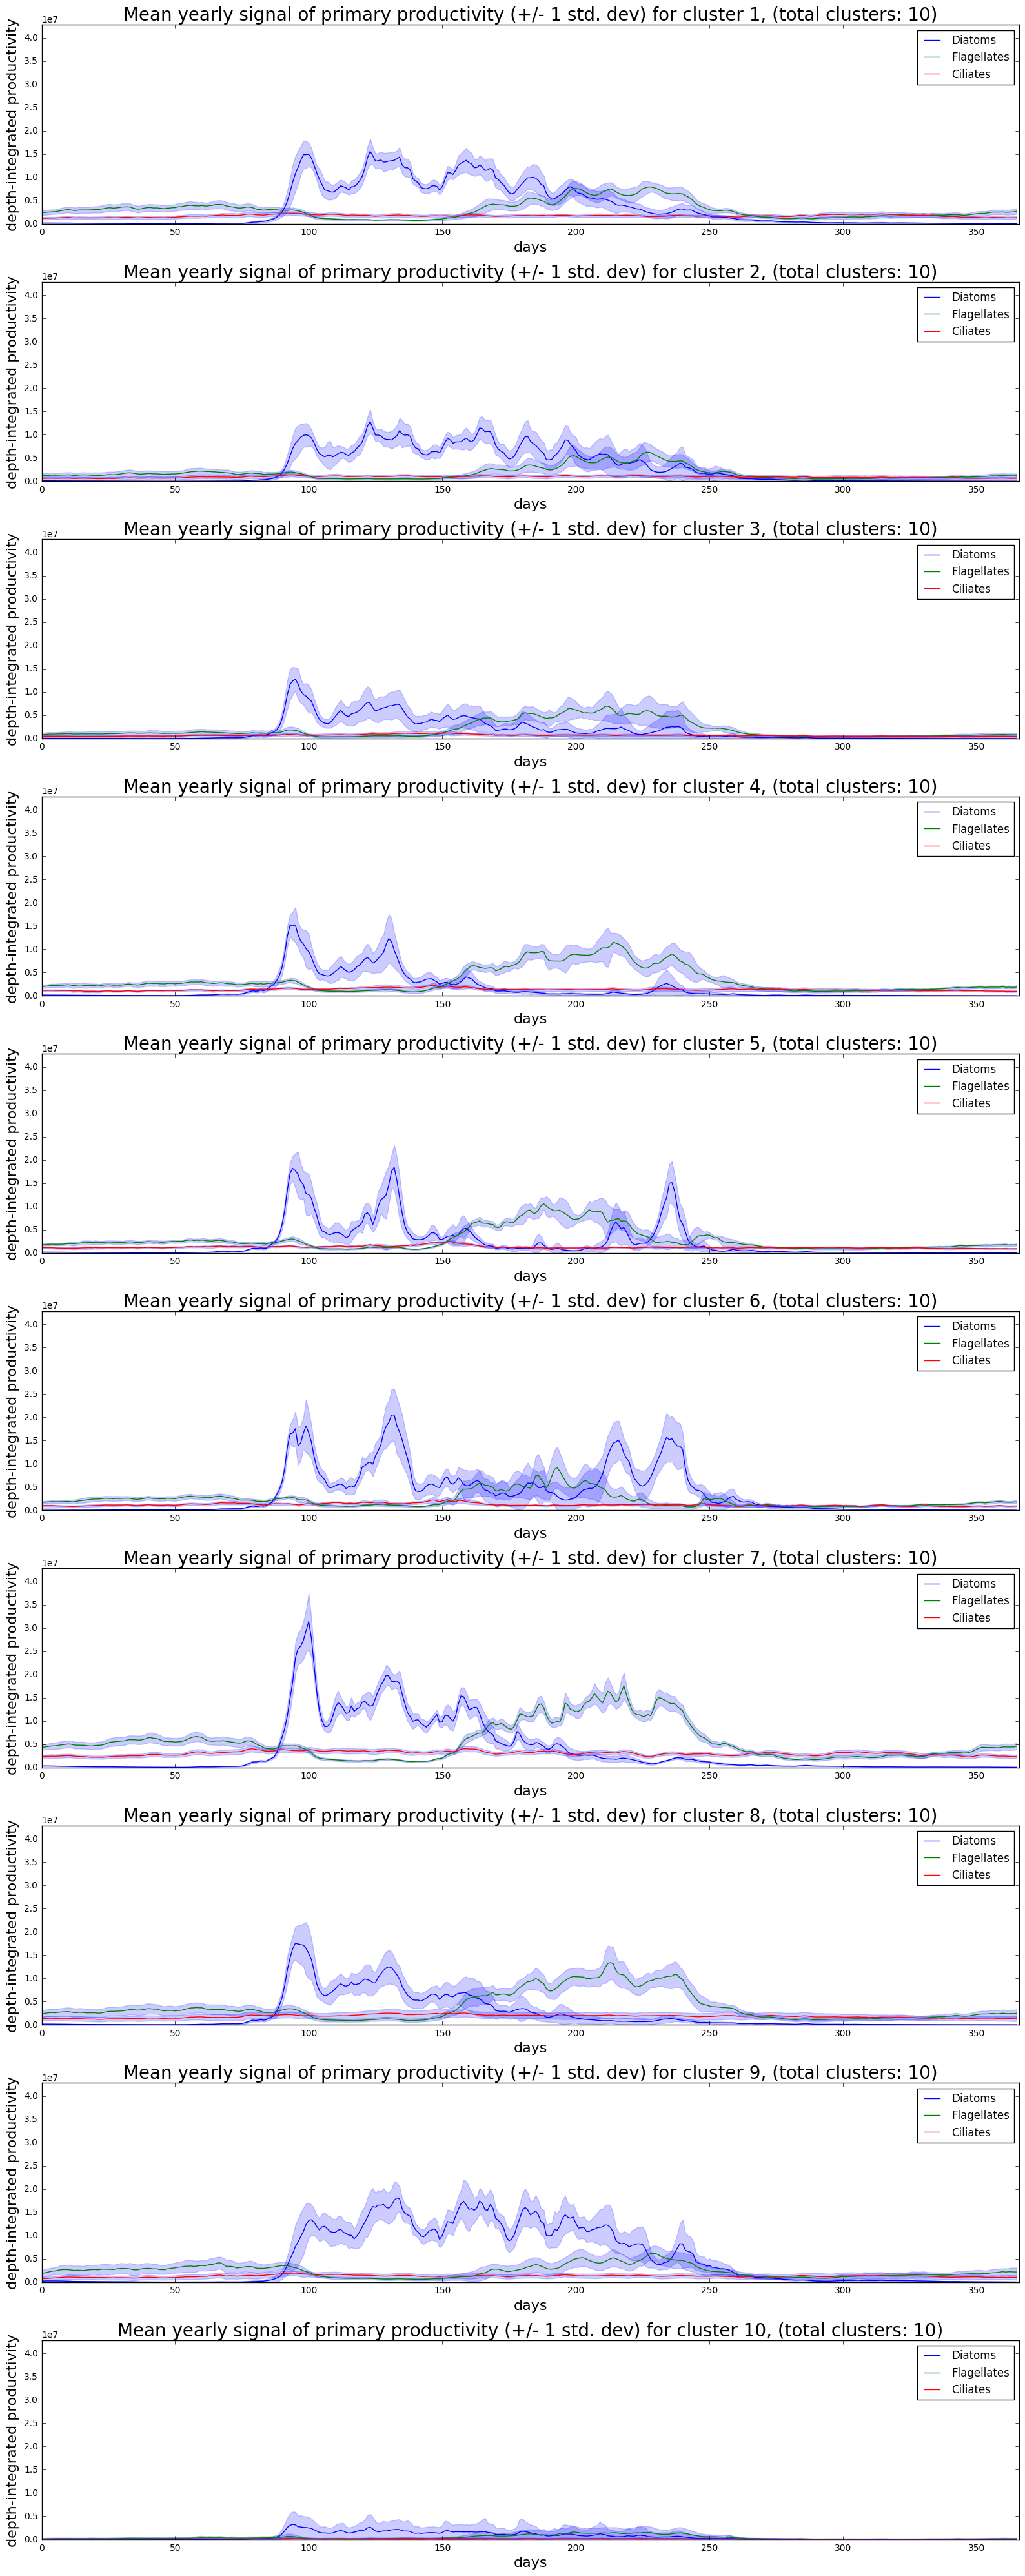

11
11
[11 11 11 11 11 11 11 11 11 11 10 10  4  4  4 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 11 10 10 10 10 10 10
 10 11  4 10 10 10 10 10 10 10 10 10 10  3  3 10 10 10 10  3  3  4 10 10
 10  3  3 10 10 10  3  3 10  3  3  3  5  5  5  5  9  4 10  3  3  3  4 11
  5  1  1  1  1  1  6  4 10  3  3  6  6  7  7  7  5  1  1  1  1  1  1  1
  2  2  2  6 10  3  3  6  6  6  7  7  7  1  1  1  1  1  1  1  1  7  7  2
  6  6  4  3  3  3  3  3  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
 10  3  3  3  3  3  6  7  7  6  7  7  7  7  7  7  7  7  7  7  7  7  7  6
  4  4  4  3  3  3  4  6  7  7  7  7  7  7  7  7  7  7  7  7  2  3  6 10
  3  3  3  4  3  6  7  6  6  7  7  7  7  2  3 11 10  3  3  3  4  6  6  6
  6  6  6  6  7  7  7  5  2  9  9 10 10 10  3  3  3  3  9 11  9  6  6  6
  6  6  6  6  6  6  6  6  5  2  9  9  9  9 10  4  3  4  3  3  9  9  5  9
  5  5  9  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  2  9  9 10  4
  3  3  3 11  3  4  8  8  8  5  5  9  9  5  6

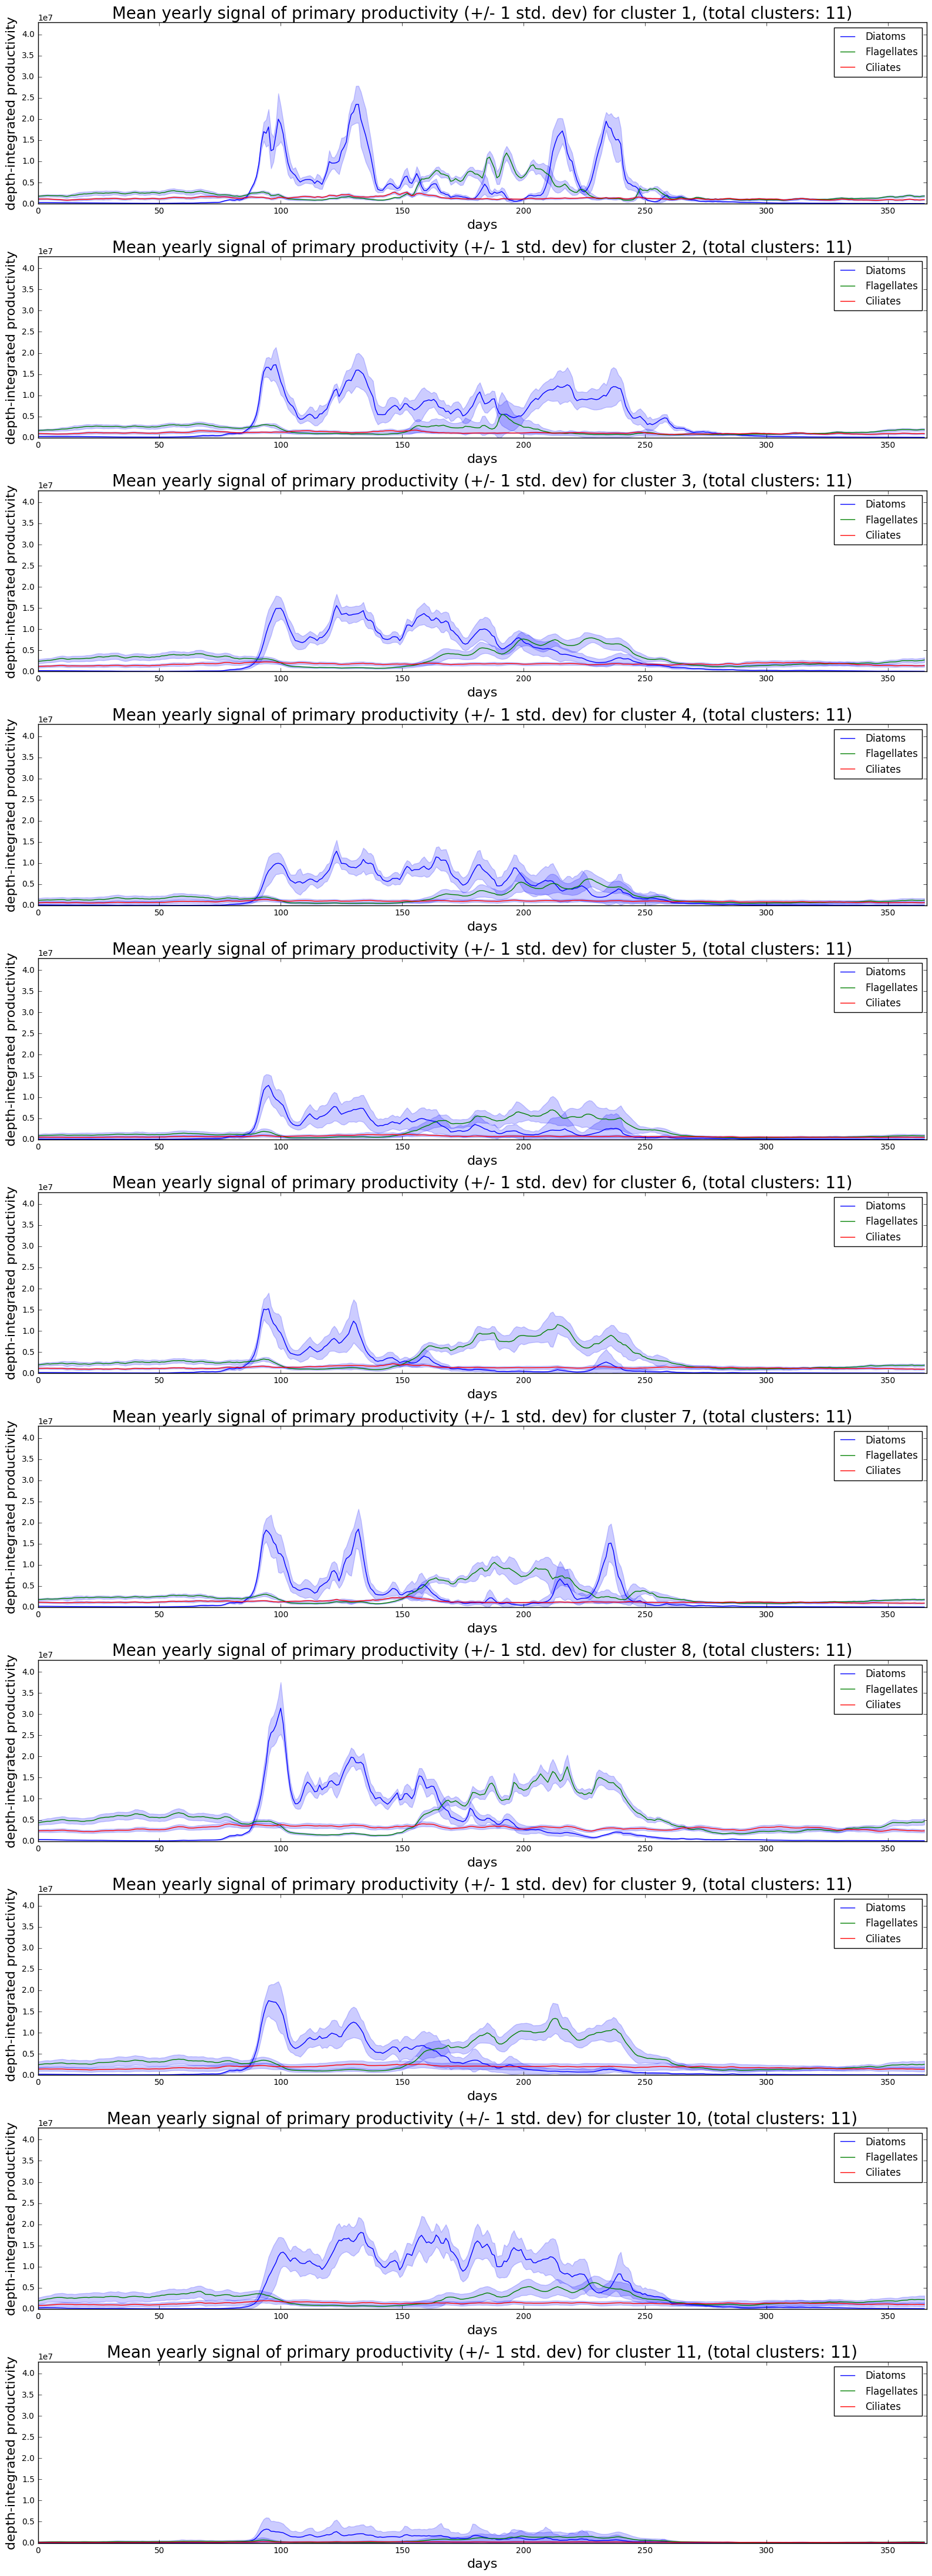

12
12
[12 12 12 12 12 12 12 12 12 12  1  1  6  6  6  1  1  1  1  1  1  2  1  1
  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1 12  2  1  1  1  1  1
  1 12  6  2  1  1  1  1  1  2  1  1  1  5  5  2  1  1  1  5  5  6  2  1
  1  5  5  2  1  1  5  5  1  5  5  5  7  7  7  7 11  6  1  5  5  5  6 12
  7  3  3  3  3  3  8  6  1  5  5  8  8  9  9  9  7  3  3  3  3  3  3  3
  4  4  4  8  2  5  5  8  8  8  9  9  9  3  3  3  3  3  3  3  3  9  9  4
  8  8  6  5  5  5  5  5  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
  1  5  5  5  5  5  8  9  9  8  9  9  9  9  9  9  9  9  9  9  9  9  9  8
  6  6  6  5  5  5  6  8  9  9  9  9  9  9  9  9  9  9  9  9  4  5  8  2
  5  5  5  6  5  8  9  8  8  9  9  9  9  4  5 12  2  5  5  5  6  8  8  8
  8  8  8  8  9  9  9  7  4 11 11  1  1  1  5  5  5  5 11 12 11  8  8  8
  8  8  8  8  8  8  8  8  7  4 11 11 11 11  1  6  5  6  5  5 11 11  7 11
  7  7 11  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  8  4 11 11  2  6
  5  5  5 12  5  6 10 10 10  7  7 11 11  7  8

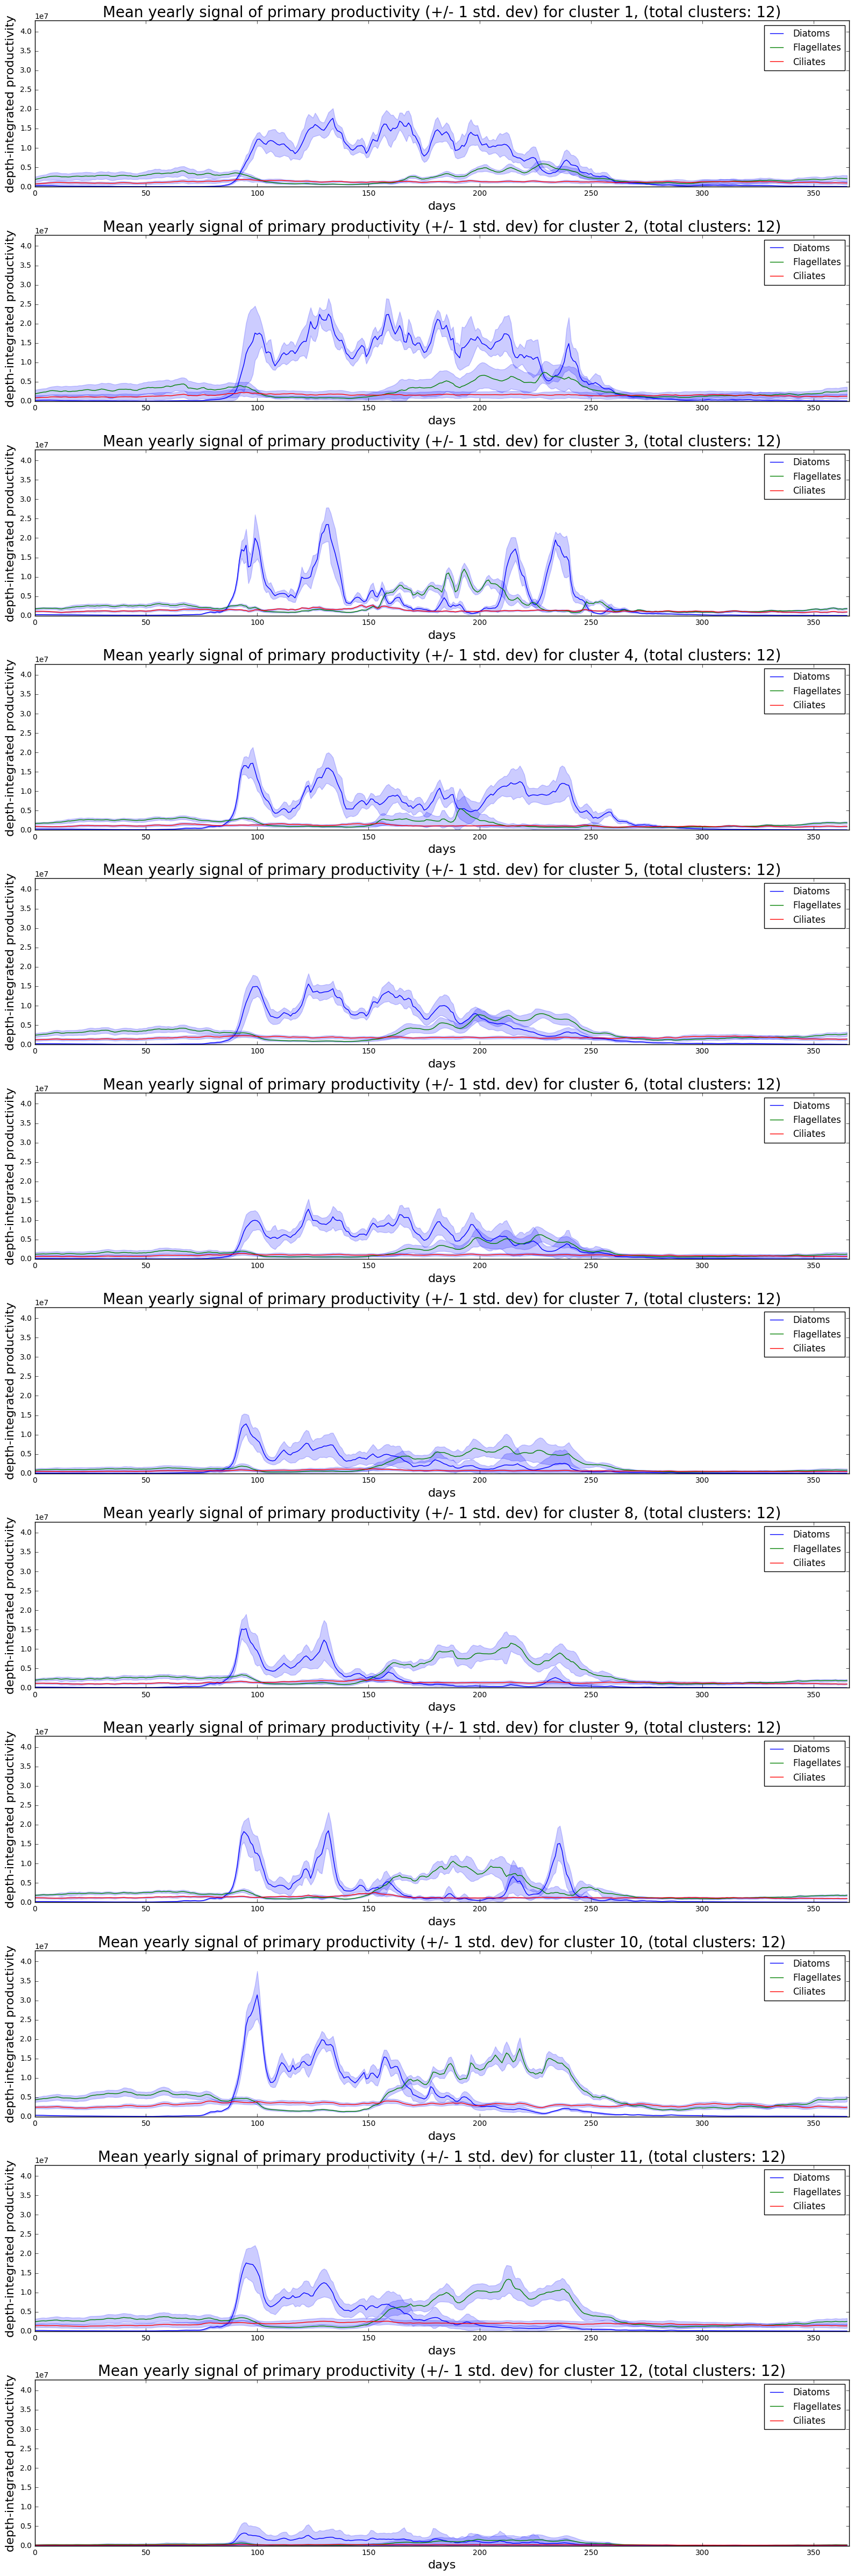

In [59]:
## Load data and pick cluster number
ts = 'primary productivity'
#fname = vr + '_' + year + 'clN.mat'
noday = 365

fname = './datamats/' + vr + '_' + year + 'hind_cl.mat'
fname2 = './datamats/' + vr + '_' + year + 'hind.mat'
ylb = 'primary productivity'


if year == '2016':
    noday = 366

else:
    noday = 365
tdir = '/data/tjarniko/MEOPAR/at3/notebooks/CLUSTER/verze2pt0/hind_clfxn/maps_signals_nclust/clmats/'
walrus = sio.loadmat(fname)
walrus2 = sio.loadmat(fname2)
print(walrus2)

signalmat = (walrus2['datamat'])


no_cl = [1,2,3,4,5,6,7,8,9,10,11,12]
clusters = (walrus['clusters'])
sigmat = (walrus2['datamat'])
var_to_include = [0,1,2]


range_min = 0
range_max = np.max(sigmat) * 1.05

for i in range(0,len(no_cl)):
    print(no_cl[i])
    #this cluster number
    t_cl = no_cl[i]
    print(t_cl)
    #cluster designation
    cl_des = (clusters[t_cl-1,:])
    print(cl_des)
    
    #mean_patterns, std_dev_patterns = cf.find_mean_patterns(sigmat,t_cl,cl_des,noday)
    mean_patterns, std_dev_patterns = cf.find_mean_patterns_mv(sigmat,t_cl,cl_des,var_to_include, noday)
    print(max(no_cl))
    #print(mean_patterns)
    print(mean_patterns.shape)
    fig = plt.figure(figsize=(16,4*t_cl))
    no_clusters = t_cl
    cln2 = str(no_clusters)

    if len(cln2) ==1:
        cln2 = '0'+cln2
    for j in range(1,no_clusters+1):
        
        ax = fig.add_subplot(no_clusters,1,j)
        for w in range(0,3):
            pattern = mean_patterns[j-1,:,w]
            st_dev = std_dev_patterns[j-1,:,w]
            days = np.arange(noday)
        
            ax.plot(days,pattern)
            ax.fill_between(days,pattern+st_dev,pattern-st_dev, color = 'b', alpha = 0.2)

        ax.set_ylim([0,range_max])
        ax.set_xlim([0,366])
        plt.xlabel('days', fontsize=16)
        plt.ylabel('depth-integrated productivity', fontsize=16)
        plt.legend(['Diatoms','Flagellates','Ciliates'])
        titstring = 'Mean yearly signal of ' + ts +' (+/- 1 std. dev) for cluster ' + str(j) + ', (total clusters: ' + str(no_clusters) + ')'
        ax.set_title(titstring, fontsize = 20)
        


    fname = './figs/' + vr + year + 'sig_cl_' + str(cln2) + '.png'
    plt.tight_layout()
    plt.tight_layout()
    plt.savefig(fname)

    plt.show()
    

## Figure for poster


In [60]:
print('DONE')

DONE


In [61]:
# no_cl = [9]
# clusters = (walrus['clusters'])
# sigmat = (walrus['datamat'])
# var_to_include = [0,1,2]
# cl_show = 2

# range_min = 0
# #range_max = np.max(sigmat) * 1.05

# for i in range(0,len(no_cl)):
#     print(no_cl[i])
#     #this cluster number
#     t_cl = no_cl[i]
#     print(t_cl)
#     #cluster designation
#     cl_des = (clusters[t_cl-1,:])
#     print(cl_des)
    
#     #mean_patterns, std_dev_patterns = cf.find_mean_patterns(sigmat,t_cl,cl_des,noday)
#     mean_patterns, std_dev_patterns = cf.find_mean_patterns_mv(signalmat,t_cl,cl_des,var_to_include, 366)
#     print(max(no_cl))
#     #print(mean_patterns)
#     print(mean_patterns.shape)
#     fig = plt.figure(figsize=(16,4*cl_show))
#     no_clusters = t_cl
#     for j in range(1,cl_show+1):
#         t_c = 6 + j
#         t_c2 = [2,7]
#         ax = fig.add_subplot(cl_show,1,j)
#         for w in range(0,3):
#             t_c = t_c2[j-1]
#             pattern = mean_patterns[t_c-1,:,w]
#             pattern = pattern/218509
#             st_dev = std_dev_patterns[t_c-1,:,w]
#             st_dev = st_dev/218509
#             days = np.arange(noday)
        
#             ax.plot(days,pattern)
#             ax.fill_between(days,pattern+st_dev,pattern-st_dev, color = 'b', alpha = 0.2)

#         ax.set_ylim([0,160])
#         ax.set_xlim([0,365])
#         if j ==1:
#             ax.set_xticklabels([])
#             plt.legend(['cl. 2 - Diatoms','cl. 2 - Flagellates','cl. 2 - M. rubrum'], fontsize = 30)
#         if j == 2:
#             plt.xlabel('days', fontsize=20)
#             plt.xticks(fontsize = '20')
#             plt.legend(['cl. 7 - Diatoms','cl. 7 - Flagellates','cl. 7 - M. rubrum'], fontsize = 30)
#         plt.ylabel('mmol N m$^{-2}$', fontsize=30)
#         plt.yticks(fontsize = '25')
#         #plt.legend(['Diatoms','Flagellates','M. rubrum'], fontsize = 20)
        


#     fname = './figs/' + vr + year + '_cl_' + str(no_clusters) + 'signals.jpg'
#     plt.tight_layout()
#     plt.tight_layout()
#     plt.savefig(fname)

#     plt.show()
    

## 